<a href="https://colab.research.google.com/github/Birajlayek/BTP_Li_dentrite/blob/main/BTP_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imgaug opencv-python


In [ ]:
import os
import cv2
import imgaug.augmenters as iaa
import numpy as np

In [ ]:
def load_images_from_directory(directory):
    images = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                filenames.append(filename)
    return images, filenames

In [ ]:
def save_images_to_directory(directory, images, filenames, suffix='_aug'):
    if not os.path.exists(directory):
        os.makedirs(directory)
    for img, filename in zip(images, filenames):
        extension = filename.split('.')[-1]
        save_path = os.path.join(directory, filename.split('.')[0] + suffix + '.' + extension)
        cv2.imwrite(save_path, img)

In [ ]:
def augment_images(images):
    seq = iaa.Sequential([
        # Geometric augmentations
        iaa.Fliplr(0.5),  # Flip 50% of the images horizontally
        iaa.Flipud(0.5),  # Flip 50% of the images vertically
        iaa.Affine(rotate=(-45, 45)),  # Rotate between -45 and 45 degrees
        iaa.Affine(scale=(0.5, 1.5)),  # Scale images between 50% and 150%
        iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),  # Translate images

        # Color and brightness augmentations
        iaa.Multiply((0.5, 1.5)),  # Randomly change brightness
        iaa.AddToHueAndSaturation((-50, 50)),  # Change hue and saturation
        iaa.Grayscale(alpha=(0.0, 1.0)),  # Convert images to grayscale with varying intensity
        iaa.ContrastNormalization((0.5, 2.0)),  # Adjust contrast

        # Blurring and sharpening
        iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),  # Sharpen images

        # Noise
        iaa.AdditiveGaussianNoise(scale=(0, 0.2 * 255)),  # Add Gaussian noise
        iaa.SaltAndPepper(0.1),  # Add salt and pepper noise
        iaa.CoarseDropout((0.02, 0.1), size_percent=(0.02, 0.25)),  # Randomly drop pixels

        # Miscellaneous augmentations
        iaa.PerspectiveTransform(scale=(0.01, 0.1)),  # Apply perspective transformation
        iaa.ElasticTransformation(alpha=50, sigma=5),  # Apply elastic transformation
        iaa.WithBrightnessChannels(iaa.Multiply((0.5, 1.5))),  # Adjust brightness in channels
        iaa.WithHueAndSaturation(iaa.WithChannels([0, 1, 2], iaa.Multiply((0.5, 1.5)))),  # Adjust hue and saturation
    ], random_order=True)  # Apply augmentations in random order
    return seq(images=images)

In [ ]:
input_directory = "/content/drive/MyDrive/images"
output_directory = "output_directory"

In [ ]:
images, filenames = load_images_from_directory(input_directory)
augmented_images = augment_images(images)
save_images_to_directory(output_directory, augmented_images, filenames)
print(f"Augmented images saved to {output_directory}")

/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


IndexError: index 2 is out of bounds for axis 2 with size 2

In [ ]:
import os
import cv2
import imgaug.augmenters as iaa
import numpy as np

# Function to load images from a directory and ensure they have 3 channels (RGB)
def load_images_from_directory(directory):
    images = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load image with all channels
            if img is not None:
                print(f"Loaded image: {filename} with shape: {img.shape}")
                # Handle images with different channels
                if len(img.shape) == 2:  # Grayscale image
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                elif img.shape[2] == 1:  # Grayscale with a single channel
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                elif img.shape[2] == 4:  # RGBA image with 4 channels
                    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
                # Ensure the image is in RGB format
                images.append(img)
                filenames.append(filename)
    return images, filenames

# Function to save images to a directory
def save_images_to_directory(directory, images, filenames, suffix='_aug'):
    if not os.path.exists(directory):
        os.makedirs(directory)
    for img, filename in zip(images, filenames):
        extension = filename.split('.')[-1]
        save_path = os.path.join(directory, filename.split('.')[0] + suffix + '.' + extension)
        cv2.imwrite(save_path, img)

# Define a comprehensive set of augmentations
def augment_images(images):
    seq = iaa.Sequential([
        # Geometric augmentations
        iaa.Fliplr(0.5),  # Flip 50% of the images horizontally
        iaa.Flipud(0.5),  # Flip 50% of the images vertically
        iaa.Affine(rotate=(-45, 45)),  # Rotate between -45 and 45 degrees
        iaa.Affine(scale=(0.5, 1.5)),  # Scale images between 50% and 150%
        iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),  # Translate images

        # Color and brightness augmentations
        iaa.Multiply((0.5, 1.5)),  # Randomly change brightness
        iaa.AddToHueAndSaturation((-50, 50)),  # Change hue and saturation
        iaa.Grayscale(alpha=(0.0, 1.0)),  # Convert images to grayscale with varying intensity
        iaa.ContrastNormalization((0.5, 2.0)),  # Adjust contrast

        # Blurring and sharpening
        iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),  # Sharpen images

        # Noise
        iaa.AdditiveGaussianNoise(scale=(0, 0.2 * 255)),  # Add Gaussian noise
        iaa.SaltAndPepper(0.1),  # Add salt and pepper noise
        iaa.CoarseDropout((0.02, 0.1), size_percent=(0.02, 0.25)),  # Randomly drop pixels

        # Miscellaneous augmentations
        iaa.PerspectiveTransform(scale=(0.01, 0.15)),  # Perspective transform
    ])
    return seq(images=images)

# Main script to load, augment, and save images
input_directory = '/content/drive/MyDrive/images'
output_directory = 'output_directory'

# Load images
images, filenames = load_images_from_directory(input_directory)

# Augment images
augmented_images = augment_images(images)

# Save augmented images
save_images_to_directory(output_directory, augmented_images, filenames)

print(f"Augmented images saved to {output_directory}")


In [ ]:
import shutil
from google.colab import files

# Path to the directory you want to zip
output_directory = 'output_directory'
zip_filename = 'augmented_images.zip'

# Create a zip file of the directory
shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', output_directory)

# Download the zip file
files.download(zip_filename)


In [ ]:
import cv2
import numpy as np

# Load the image (grayscale)
image_path = '/content/img3.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Function to apply threshold and detect contours
def apply_threshold(val):
    try:
        # Apply Gaussian blur to smooth the image
        blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # Use Sobel operator to detect horizontal and vertical edges
        sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)

        # Magnitude of gradients
        gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
        gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

        # Apply user-controlled threshold
        _, thresholded = cv2.threshold(gradient_magnitude, val, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create output image and draw the contours
        output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

        # Display the image
        cv2.imshow('SPE-Anode Separation', output_image)

    except Exception as e:
        print(f"Error in applying threshold or drawing contours: {e}")

# Create a window
cv2.namedWindow('SPE-Anode Separation', cv2.WINDOW_NORMAL)

# Create trackbar for threshold adjustment
cv2.createTrackbar('Threshold', 'SPE-Anode Separation', 50, 255, apply_threshold)

# Initial threshold application
apply_threshold(50)

# Wait for user interaction and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/mnt/data/Untitled.png'
image = cv2.imread(image_path)

# Convert the image to HSV color space to isolate the green color
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV range for green (adjust if needed)
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Create a mask to isolate green pixels
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Find contours in the green mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty list to store distances from the top edge
distances = []

# Loop through the contours and calculate the distance from the top edge
for contour in contours:
    # Get the bounding box for the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Distance from the top edge (y is the distance of the topmost point of the contour)
    distances.append(y)

    # Optionally, draw contours and reference lines on the image for visualization
    cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)  # Draw the contour in red
    cv2.line(image, (0, y), (image.shape[1], y), (255, 0, 0), 2)  # Draw a horizontal line at y

# Display the result image with contours and lines
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Contours and distances from top edge")
plt.show()

# Return and print the distances
print("Distances of green contours from the top edge:")
for i, d in enumerate(distances):
    print(f"Contour {i + 1}: {d} pixels")


Please upload an image file.


Saving WhatsApp Image 2024-11-02 at 01.19.32.jpeg to WhatsApp Image 2024-11-02 at 01.19.32.jpeg
Edge Detected Image:


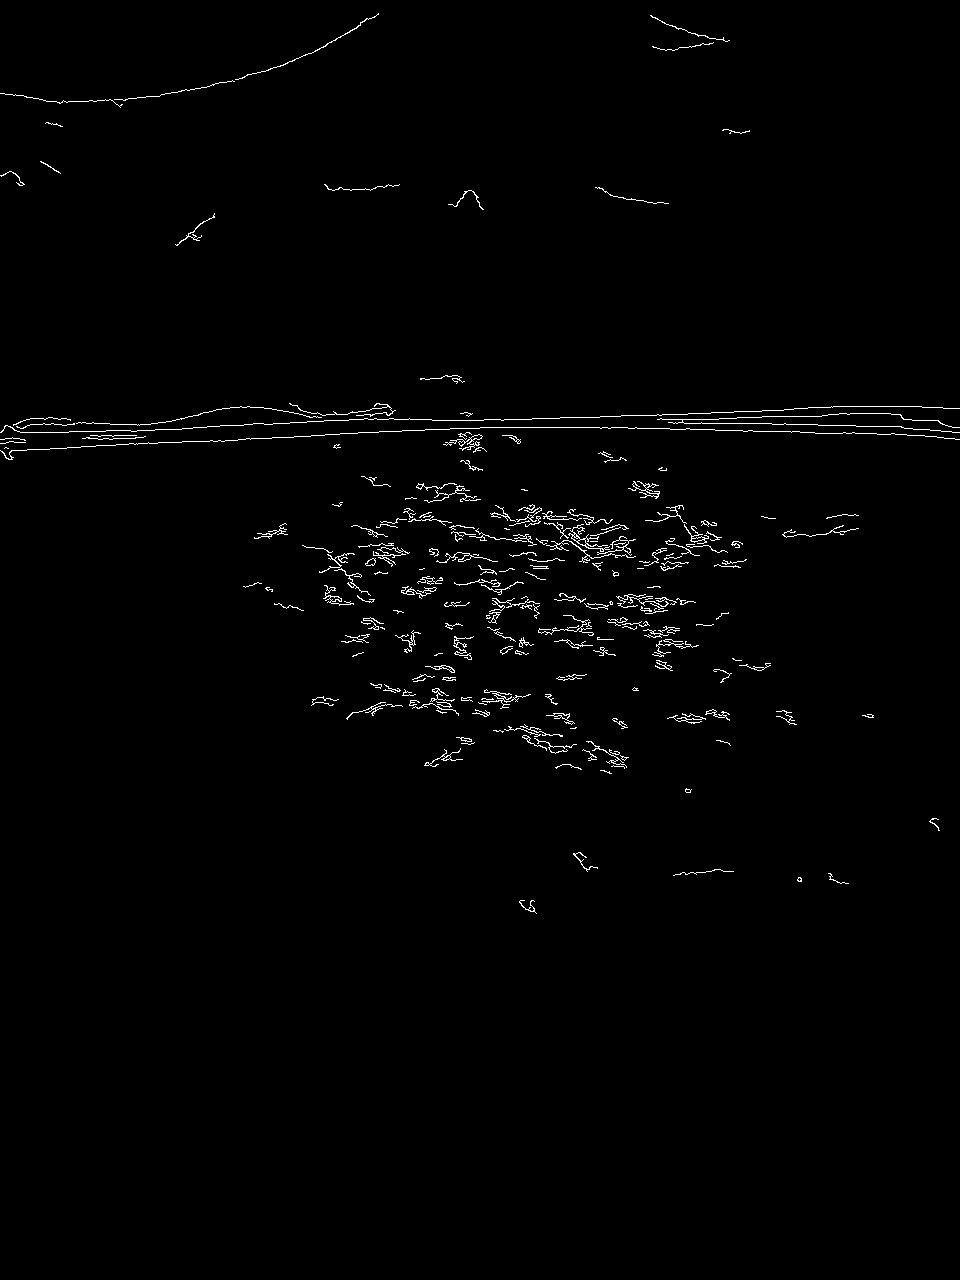

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 128, 128, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 256, 256, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 256, 256, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,697,665 (6.48 MB)

 Trainable params: 1,697,665 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the image file
print("Please upload an image file.")
uploaded = files.upload()

# Get the uploaded file path
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
def preprocess_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Denoise the image
    denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(denoised, threshold1=30, threshold2=100)

    return edges

# Define a simple U-Net model for segmentation
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    outputs = Conv2D(1, 1, activation='sigmoid', padding='same')(conv5)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Preprocess the uploaded image and apply edge detection
edges = preprocess_image(image_path)

# Display the processed image (edge-detected)
print("Edge Detected Image:")
cv2_imshow(edges)

# Initialize and display the model summary
model = unet_model()
model.summary()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from google.colab import files
from google.colab.patches import cv2_imshow

# Function to upload and preprocess the image
def preprocess_image(image_path, threshold1=30, threshold2=100):
    """
    Loads and preprocesses the image with denoising and edge detection.

    Parameters:
        image_path (str): Path to the image file.
        threshold1 (int): First threshold for the hysteresis procedure in edge detection.
        threshold2 (int): Second threshold for the hysteresis procedure in edge detection.

    Returns:
        edges (ndarray): Edge-detected image.
    """
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Denoise the image
    denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # Edge detection with variable thresholds
    edges = cv2.Canny(denoised, threshold1=threshold1, threshold2=threshold2)

    return edges

# Define a simple U-Net model for segmentation
def unet_model(input_size=(256, 256, 1)):
    """
    Creates a U-Net model for image segmentation.

    Parameters:
        input_size (tuple): The shape of the input image in (height, width, channels).

    Returns:
        model (tf.keras.Model): Compiled U-Net model.
    """
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    outputs = Conv2D(1, 1, activation='sigmoid', padding='same')(conv5)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Upload the image
print("Please upload an image file.")
uploaded = files.upload()

# Get the uploaded file path
image_path = list(uploaded.keys())[0]

# Set custom threshold values for edge detection
threshold1 = 50  # First threshold value for edge detection
threshold2 = 150 # Second threshold value for edge detection

# Preprocess the uploaded image with custom thresholds
edges = preprocess_image(image_path, threshold1=threshold1, threshold2=threshold2)

# Display the processed image (edge-detected)
print("Edge Detected Image:")
cv2_imshow(edges)

# Initialize and display the model summary
model = unet_model()
model.summary()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/download.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an array to store the distances along the x-axis
height, width = mask.shape
distances = np.full(width, height)  # Initialize with max height (image height)

# For each contour, find the minimum y-value (distance from the top) for each x-coordinate
for contour in contours:
    for point in contour:
        x, y = point[0]
        # For each x, store the smallest y-value encountered (closest to the top edge)
        if y < distances[x]:
            distances[x] = y

# Plot the distances along the x-axis
plt.plot(distances)
plt.title("Distance of the contour from the top edge along the x-axis")
plt.xlabel("x-coordinate")
plt.ylabel("Distance from top edge (pixels)")
plt.show()

# Print the distances for reference
print("Distances of the contour from the top edge for each x-coordinate:")
for x in range(width):
    print(f"x = {x}: distance = {distances[x]} pixels")


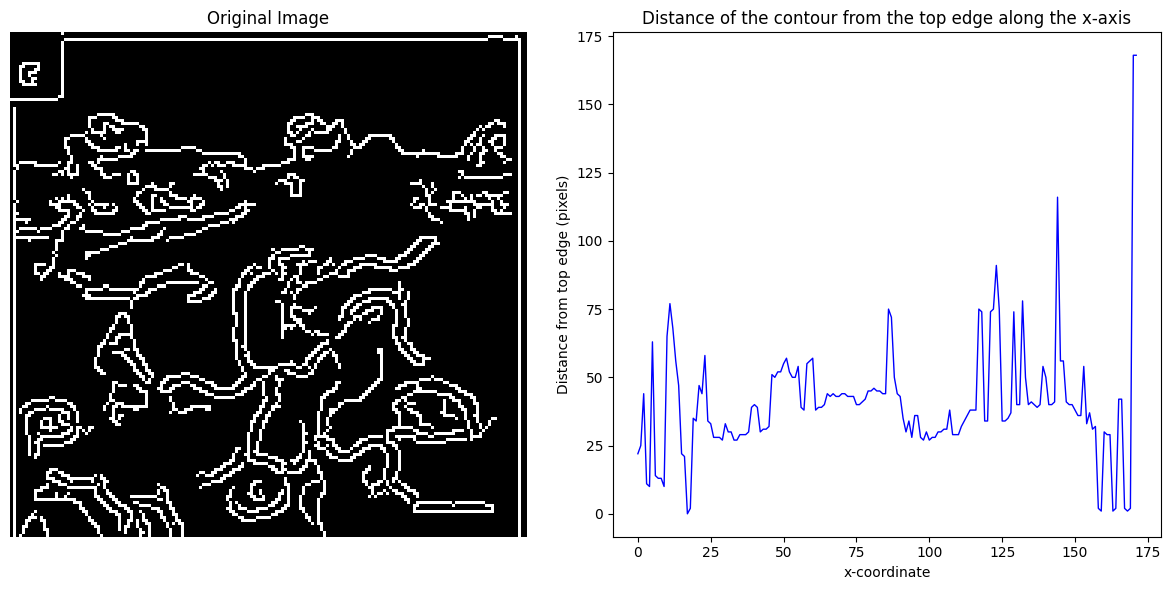

Distances of the contour from the top edge for each x-coordinate:
x = 0: distance = 22 pixels
x = 1: distance = 25 pixels
x = 2: distance = 44 pixels
x = 3: distance = 11 pixels
x = 4: distance = 10 pixels
x = 5: distance = 63 pixels
x = 6: distance = 14 pixels
x = 7: distance = 13 pixels
x = 8: distance = 13 pixels
x = 9: distance = 10 pixels
x = 10: distance = 65 pixels
x = 11: distance = 77 pixels
x = 12: distance = 68 pixels
x = 13: distance = 56 pixels
x = 14: distance = 47 pixels
x = 15: distance = 22 pixels
x = 16: distance = 21 pixels
x = 17: distance = 0 pixels
x = 18: distance = 2 pixels
x = 19: distance = 35 pixels
x = 20: distance = 34 pixels
x = 21: distance = 47 pixels
x = 22: distance = 44 pixels
x = 23: distance = 58 pixels
x = 24: distance = 34 pixels
x = 25: distance = 33 pixels
x = 26: distance = 28 pixels
x = 27: distance = 28 pixels
x = 28: distance = 28 pixels
x = 29: distance = 27 pixels
x = 30: distance = 33 pixels
x = 31: distance = 30 pixels
x = 32: distance =

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/download.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an array to store the distances along the x-axis
height, width = mask.shape
distances = np.full(width, height)  # Initialize with max height (image height)

# For each contour, find the minimum y-value (distance from the top) for each x-coordinate
for contour in contours:
    for point in contour:
        x, y = point[0]
        # For each x, store the smallest y-value encountered (closest to the top edge)
        if y < distances[x]:
            distances[x] = y

# Plot the original image and the distance plot side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot the distances along the x-axis
plt.subplot(1, 2, 2)
plt.plot(distances, color='blue', linewidth=1)
plt.title("Distance of the contour from the top edge along the x-axis")
plt.xlabel("x-coordinate")
plt.ylabel("Distance from top edge (pixels)")

# Show both plots
plt.tight_layout()
plt.show()

# Print the distances for reference (optional)
print("Distances of the contour from the top edge for each x-coordinate:")
for x in range(width):
    print(f"x = {x}: distance = {distances[x]} pixels")


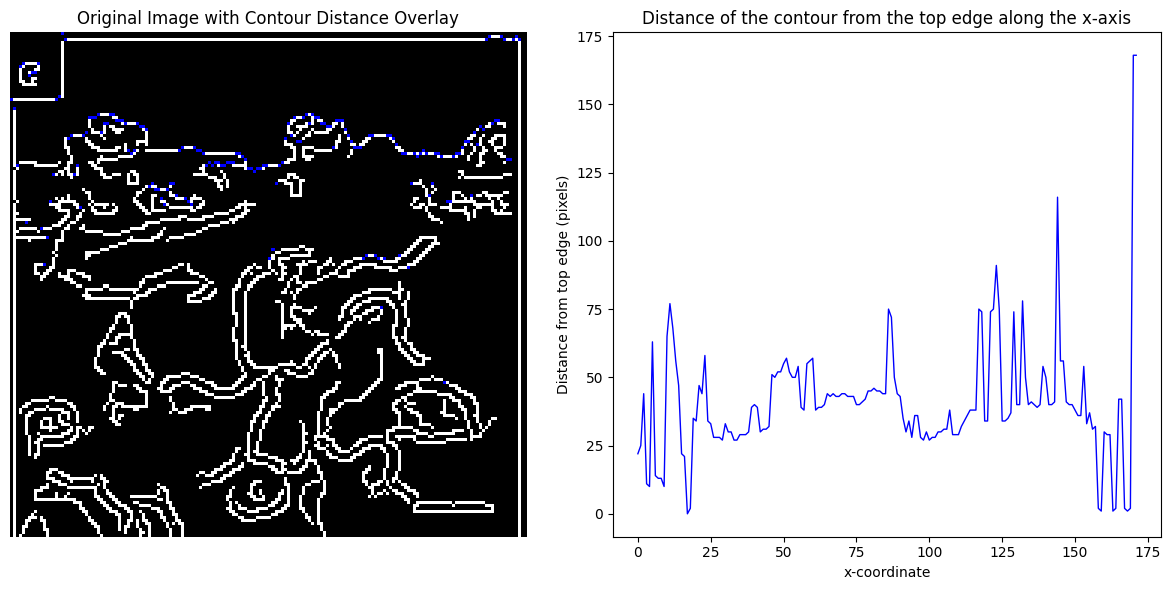

Distances of the contour from the top edge for each x-coordinate:
x = 0: distance = 22 pixels
x = 1: distance = 25 pixels
x = 2: distance = 44 pixels
x = 3: distance = 11 pixels
x = 4: distance = 10 pixels
x = 5: distance = 63 pixels
x = 6: distance = 14 pixels
x = 7: distance = 13 pixels
x = 8: distance = 13 pixels
x = 9: distance = 10 pixels
x = 10: distance = 65 pixels
x = 11: distance = 77 pixels
x = 12: distance = 68 pixels
x = 13: distance = 56 pixels
x = 14: distance = 47 pixels
x = 15: distance = 22 pixels
x = 16: distance = 21 pixels
x = 17: distance = 0 pixels
x = 18: distance = 2 pixels
x = 19: distance = 35 pixels
x = 20: distance = 34 pixels
x = 21: distance = 47 pixels
x = 22: distance = 44 pixels
x = 23: distance = 58 pixels
x = 24: distance = 34 pixels
x = 25: distance = 33 pixels
x = 26: distance = 28 pixels
x = 27: distance = 28 pixels
x = 28: distance = 28 pixels
x = 29: distance = 27 pixels
x = 30: distance = 33 pixels
x = 31: distance = 30 pixels
x = 32: distance =

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/download.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an array to store the distances along the x-axis
height, width = mask.shape
distances = np.full(width, height)  # Initialize with max height (image height)

# For each contour, find the minimum y-value (distance from the top) for each x-coordinate
for contour in contours:
    for point in contour:
        x, y = point[0]
        # For each x, store the smallest y-value encountered (closest to the top edge)
        if y < distances[x]:
            distances[x] = y

# Convert the original grayscale image to BGR for color overlay
overlay_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Overlay the calculated distance line on the original image in red
for x in range(width):
    y = distances[x]
    if y < height:  # Only plot points within the image height
        overlay_image[y, x] = (0, 0, 255)  # Red color for the contour line

# Plot the original image with overlay and the distance plot side by side
plt.figure(figsize=(12, 6))

# Display the original image with overlay
plt.subplot(1, 2, 1)
plt.imshow(overlay_image)
plt.title("Original Image with Contour Distance Overlay")
plt.axis('off')

# Plot the distances along the x-axis
plt.subplot(1, 2, 2)
plt.plot(distances, color='blue', linewidth=1)
plt.title("Distance of the contour from the top edge along the x-axis")
plt.xlabel("x-coordinate")
plt.ylabel("Distance from top edge (pixels)")

# Show both plots
plt.tight_layout()
plt.show()

# Print the distances for reference (optional)
print("Distances of the contour from the top edge for each x-coordinate:")
for x in range(width):
    print(f"x = {x}: distance = {distances[x]} pixels")


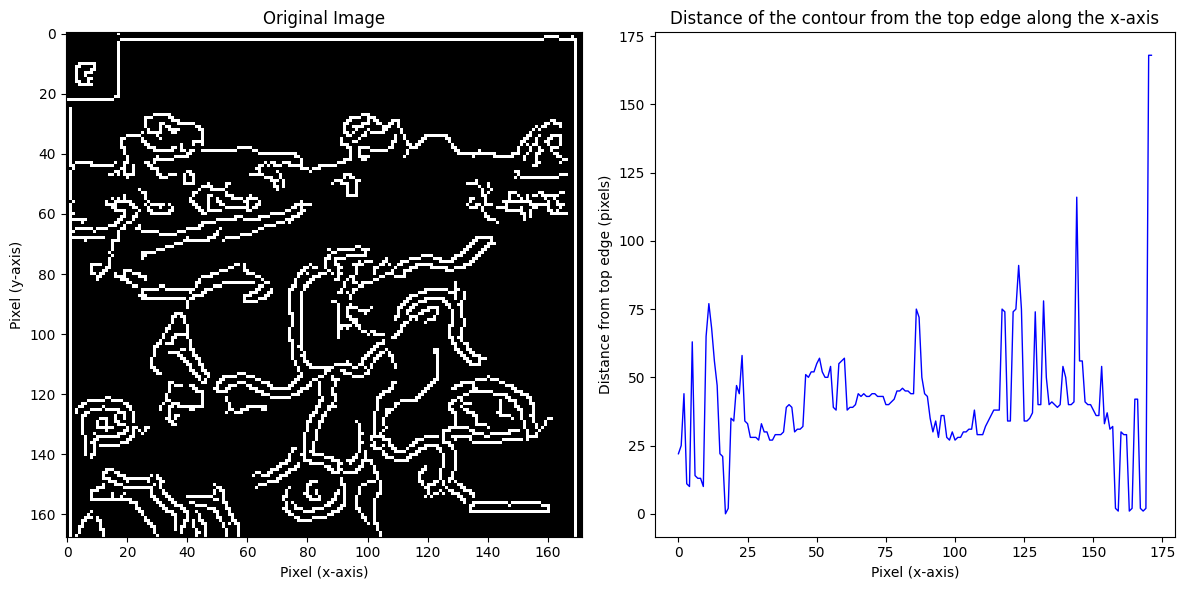

Distances of the contour from the top edge for each x-coordinate:
x = 0: distance = 22 pixels
x = 1: distance = 25 pixels
x = 2: distance = 44 pixels
x = 3: distance = 11 pixels
x = 4: distance = 10 pixels
x = 5: distance = 63 pixels
x = 6: distance = 14 pixels
x = 7: distance = 13 pixels
x = 8: distance = 13 pixels
x = 9: distance = 10 pixels
x = 10: distance = 65 pixels
x = 11: distance = 77 pixels
x = 12: distance = 68 pixels
x = 13: distance = 56 pixels
x = 14: distance = 47 pixels
x = 15: distance = 22 pixels
x = 16: distance = 21 pixels
x = 17: distance = 0 pixels
x = 18: distance = 2 pixels
x = 19: distance = 35 pixels
x = 20: distance = 34 pixels
x = 21: distance = 47 pixels
x = 22: distance = 44 pixels
x = 23: distance = 58 pixels
x = 24: distance = 34 pixels
x = 25: distance = 33 pixels
x = 26: distance = 28 pixels
x = 27: distance = 28 pixels
x = 28: distance = 28 pixels
x = 29: distance = 27 pixels
x = 30: distance = 33 pixels
x = 31: distance = 30 pixels
x = 32: distance =

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/download.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an array to store the distances along the x-axis
height, width = mask.shape
distances = np.full(width, height)  # Initialize with max height (image height)

# For each contour, find the minimum y-value (distance from the top) for each x-coordinate
for contour in contours:
    for point in contour:
        x, y = point[0]
        # For each x, store the smallest y-value encountered (closest to the top edge)
        if y < distances[x]:
            distances[x] = y

# Plot the original image and the distance plot side by side
plt.figure(figsize=(12, 6))

# Display the original image with pixel values on x and y axes
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', origin='upper')
plt.title("Original Image")
plt.xlabel("Pixel (x-axis)")
plt.ylabel("Pixel (y-axis)")

# Plot the distances along the x-axis
plt.subplot(1, 2, 2)
plt.plot(distances, color='blue', linewidth=1)
plt.title("Distance of the contour from the top edge along the x-axis")
plt.xlabel("Pixel (x-axis)")
plt.ylabel("Distance from top edge (pixels)")

# Show both plots
plt.tight_layout()
plt.show()

# Print the distances for reference (optional)
print("Distances of the contour from the top edge for each x-coordinate:")
for x in range(width):
    print(f"x = {x}: distance = {distances[x]} pixels")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/download2.png'  # Path to the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize maximum distance from the top
height, width = mask.shape
max_distance_from_top = 0  # Initialize with minimum possible distance

# Find the last contour closest to the bottom edge (farthest from the top)
for contour in contours:
    for point in contour:
        x, y = point[0]
        # Calculate distance from the top edge
        distance_from_top = y
        # Update the maximum distance if a farther contour point is found
        if distance_from_top > max_distance_from_top:
            max_distance_from_top = distance_from_top

# Convert the original grayscale image to BGR for visualization
overlay_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Overlay a line at the contour farthest from the top edge
for contour in contours:
    for point in contour:
        x, y = point[0]
        if y == max_distance_from_top:
            overlay_image[y, x] = (0, 0, 255)  # Red color for visualization

# Display the original image with overlay
plt.figure(figsize=(6, 6))
plt.imshow(overlay_image, cmap='gray')
plt.title(f"Last Contour Distance from Top: {max_distance_from_top} pixels")
plt.axis('off')
plt.show()

# Print the maximum distance
print(f"The distance of the last contour edge from the top edge is: {max_distance_from_top} pixels.")


In [ ]:
#vlm

In [2]:
# Install required libraries
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python-headless


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ey4j6e9z
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ey4j6e9z
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=78ad87188b6ef51a07db0a8bb8dfdd29c73986ca69609271a1f5320ad96a0fd2
  Stored in directory: /tmp/pip-ephem-wheel-cache-jwb2d1cv/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [3]:
# Install PyTorch (if not already installed)
!pip install torch torchvision


In [4]:
# Download the SAM model weights
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


--2024-11-11 03:28:21--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.14, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   160MB/s    in 18s     

2024-11-11 03:28:39 (137 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51.jpeg


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Width of the white region: 1 pixels


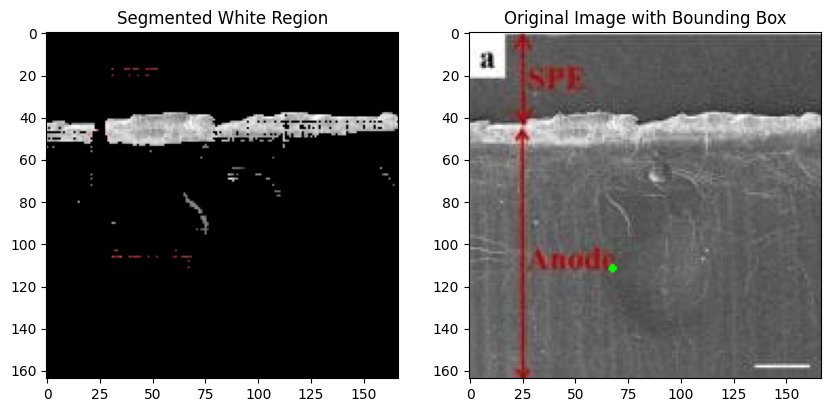

In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload image from local system
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Prepare the image for SAM
predictor.set_image(image)

# Obtain segmentation masks
masks, _, _ = predictor.predict()

# Post-process mask to get the white region (assuming the brightest region is desired)
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Convert to grayscale and find contours for width measurement
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate width of the white region
if contours:
    # Find bounding box of the white region
    x, y, w, h = cv2.boundingRect(contours[0])
    print(f"Width of the white region: {w} pixels")

    # Display the original image with overlayed bounding box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw green box around the detected region

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(white_region, cv2.COLOR_BGR2RGB))
plt.title("Segmented White Region")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Bounding Box")
plt.show()


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (1).jpeg


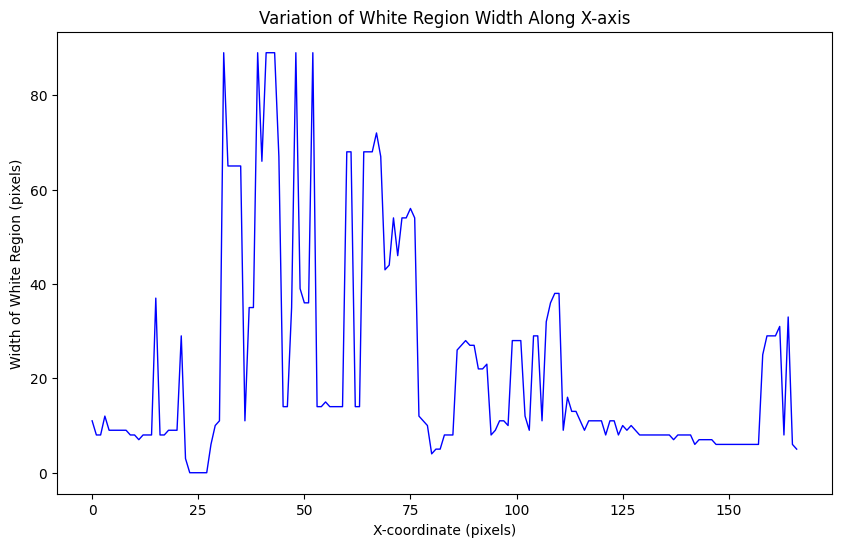

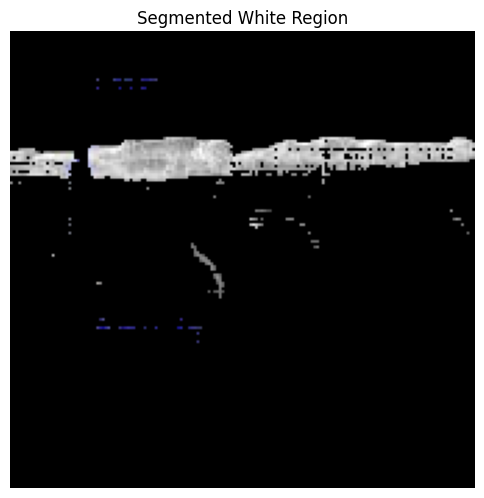

In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload image from local system
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Prepare the image for SAM
predictor.set_image(image)

# Obtain segmentation masks
masks, _, _ = predictor.predict()

# Assume the first mask is the white region
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Convert to grayscale for width calculation
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

# Array to hold the width at each x-coordinate
height, width = gray.shape
widths = np.zeros(width)

# Calculate width of white region at each x-coordinate
for x in range(width):
    column = gray[:, x]  # Extract column at x-coordinate
    white_pixels = np.where(column > 0)[0]  # Find white pixels in this column

    if white_pixels.size > 0:
        # Calculate width as difference between top and bottom of white pixels
        width_at_x = white_pixels[-1] - white_pixels[0]
        widths[x] = width_at_x
    else:
        widths[x] = 0  # No white region at this x-coordinate

# Plot the variation of width along the x-axis
plt.figure(figsize=(10, 6))
plt.plot(range(width), widths, color='blue', linewidth=1)
plt.title("Variation of White Region Width Along X-axis")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width of White Region (pixels)")
plt.show()

# Display the segmented white region for reference
plt.figure(figsize=(6, 6))
plt.imshow(white_region)
plt.title("Segmented White Region")
plt.axis('off')
plt.show()


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (2).jpeg


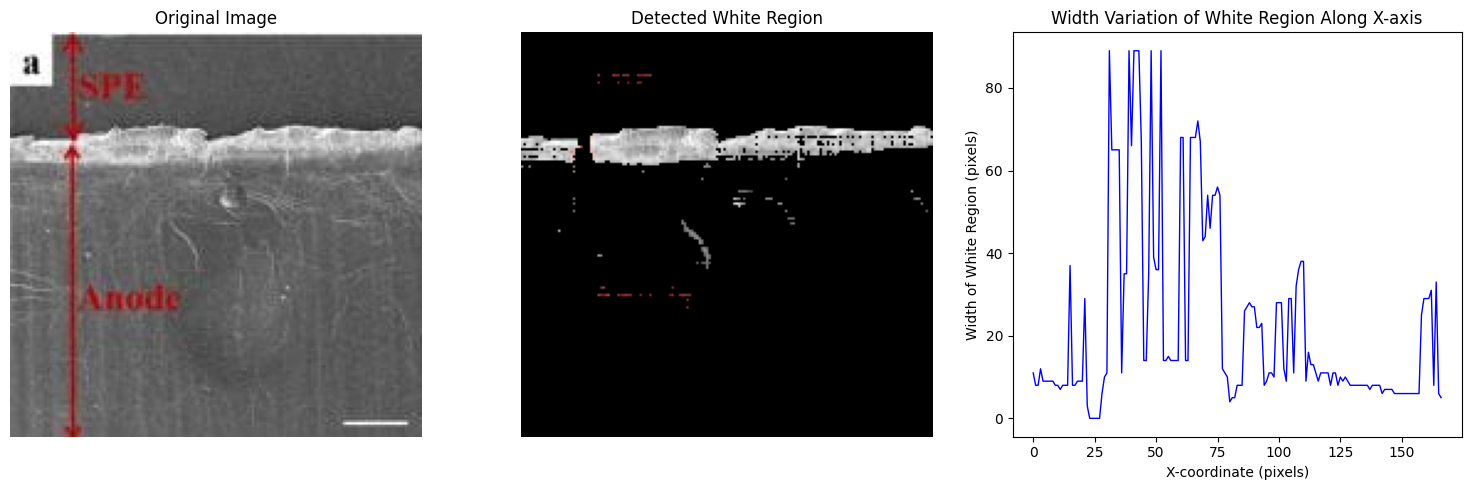

Width variation of the white region along the x-axis (in pixels):
[11.  8.  8. 12.  9.  9.  9.  9.  9.  8.  8.  7.  8.  8.  8. 37.  8.  8.
  9.  9.  9. 29.  3.  0.  0.  0.  0.  0.  6. 10. 11. 89. 65. 65. 65. 65.
 11. 35. 35. 89. 66. 89. 89. 89. 67. 14. 14. 35. 89. 39. 36. 36. 89. 14.
 14. 15. 14. 14. 14. 14. 68. 68. 14. 14. 68. 68. 68. 72. 67. 43. 44. 54.
 46. 54. 54. 56. 54. 12. 11. 10.  4.  5.  5.  8.  8.  8. 26. 27. 28. 27.
 27. 22. 22. 23.  8.  9. 11. 11. 10. 28. 28. 28. 12.  9. 29. 29. 11. 32.
 36. 38. 38.  9. 16. 13. 13. 11.  9. 11. 11. 11. 11.  8. 11. 11.  8. 10.
  9. 10.  9.  8.  8.  8.  8.  8.  8.  8.  8.  7.  8.  8.  8.  8.  6.  7.
  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6. 25. 29. 29. 29.
 31.  8. 33.  6.  5.]


In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Step 1: Upload the image
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 2: Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace with the correct path to the SAM model
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Step 3: Prepare the image for SAM
predictor.set_image(image)

# Step 4: Obtain segmentation masks
masks, _, _ = predictor.predict()

# Assume the first mask is the white region
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Step 5: Convert to grayscale for width calculation
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

# Step 6: Calculate width of the white region along the x-axis
height, width = gray.shape
widths = np.zeros(width)

for x in range(width):
    column = gray[:, x]  # Extract column at x-coordinate
    white_pixels = np.where(column > 0)[0]  # Find white pixels in this column

    if white_pixels.size > 0:
        # Calculate width as difference between top and bottom of white pixels
        width_at_x = white_pixels[-1] - white_pixels[0]
        widths[x] = width_at_x
    else:
        widths[x] = 0  # No white region at this x-coordinate

# Step 7: Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Plot 2: Detected White Region
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(white_region, cv2.COLOR_BGR2RGB))
plt.title("Detected White Region")
plt.axis('off')

# Plot 3: Width Variation Along X-axis
plt.subplot(1, 3, 3)
plt.plot(range(width), widths, color='blue', linewidth=1)
plt.title("Width Variation of White Region Along X-axis")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width of White Region (pixels)")

# Show all plots
plt.tight_layout()
plt.show()

# Print calculated widths (optional)
print("Width variation of the white region along the x-axis (in pixels):")
print(widths)


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (3).jpeg


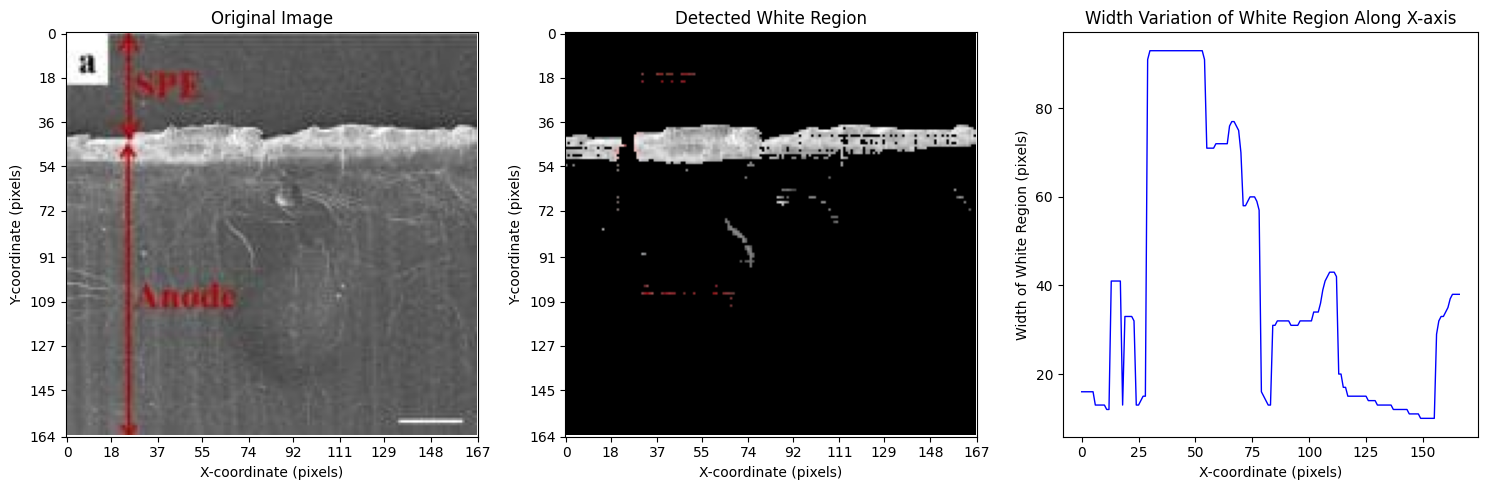

Width variation of the white region along the x-axis (in pixels):
[16. 16. 16. 16. 16. 16. 13. 13. 13. 13. 13. 12. 12. 41. 41. 41. 41. 41.
 13. 33. 33. 33. 33. 32. 13. 13. 14. 15. 15. 91. 93. 93. 93. 93. 93. 93.
 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93. 93.
 91. 71. 71. 71. 71. 72. 72. 72. 72. 72. 72. 76. 77. 77. 76. 75. 70. 58.
 58. 59. 60. 60. 60. 59. 57. 16. 15. 14. 13. 13. 31. 31. 32. 32. 32. 32.
 32. 32. 31. 31. 31. 31. 32. 32. 32. 32. 32. 32. 34. 34. 34. 36. 39. 41.
 42. 43. 43. 43. 42. 20. 20. 17. 17. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 14. 14. 14. 14. 13. 13. 13. 13. 13. 13. 13. 12. 12. 12. 12. 12. 12. 12.
 11. 11. 11. 11. 11. 10. 10. 10. 10. 10. 10. 10. 29. 32. 33. 33. 34. 35.
 37. 38. 38. 38. 38.]


In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 2: Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace with the correct path to the SAM model
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Step 3: Prepare the image for SAM
predictor.set_image(image)

# Step 4: Obtain segmentation masks
masks, _, _ = predictor.predict()

# Assume the first mask is the white region
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Step 5: Convert to grayscale and apply noise reduction
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur to reduce noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# Use morphological operations to refine the mask
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Step 6: Calculate width of the white region along the x-axis
height, width = gray.shape
widths = np.zeros(width)

for x in range(width):
    column = gray[:, x]  # Extract column at x-coordinate
    white_pixels = np.where(column > 0)[0]  # Find white pixels in this column

    if white_pixels.size > 0:
        # Calculate width as difference between top and bottom of white pixels
        width_at_x = white_pixels[-1] - white_pixels[0]
        widths[x] = width_at_x
    else:
        widths[x] = 0  # No white region at this x-coordinate

# Step 7: Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Original Image with Pixel Axes
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(np.linspace(0, width, num=10, dtype=int))
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 2: Detected White Region with Pixel Axes
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(white_region, cv2.COLOR_BGR2RGB))
plt.title("Detected White Region")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(np.linspace(0, width, num=10, dtype=int))
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 3: Width Variation Along X-axis
plt.subplot(1, 3, 3)
plt.plot(range(width), widths, color='blue', linewidth=1)
plt.title("Width Variation of White Region Along X-axis")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width of White Region (pixels)")

# Show all plots
plt.tight_layout()
plt.show()

# Print calculated widths (optional)
print("Width variation of the white region along the x-axis (in pixels):")
print(widths)


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (4).jpeg


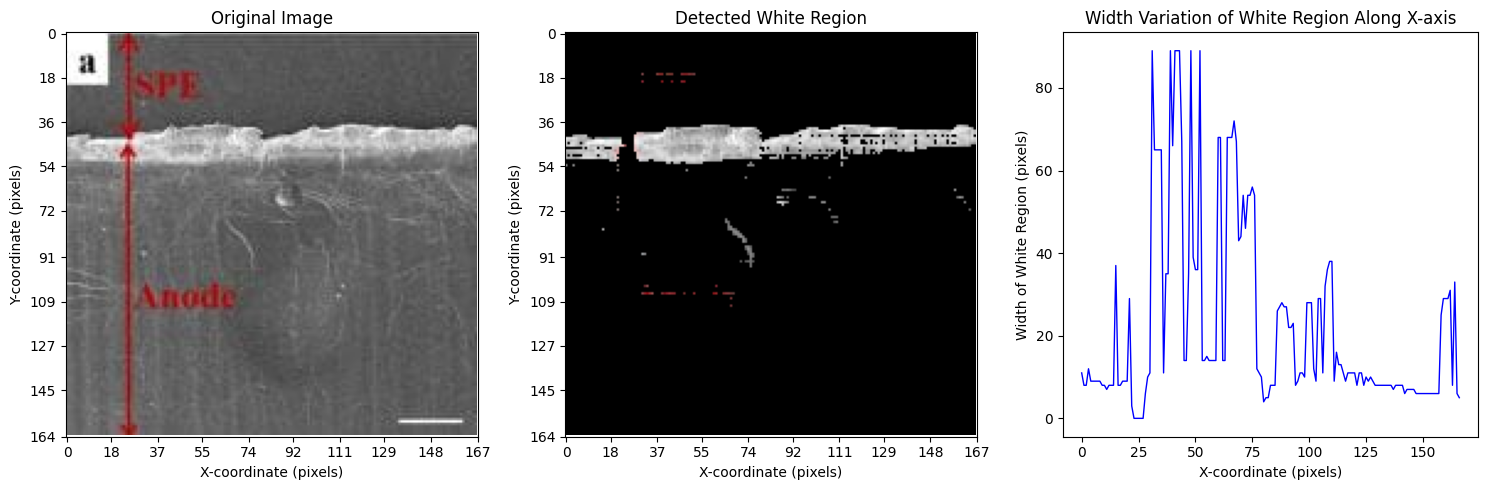

Width variation of the white region along the x-axis (in pixels):
[11.  8.  8. 12.  9.  9.  9.  9.  9.  8.  8.  7.  8.  8.  8. 37.  8.  8.
  9.  9.  9. 29.  3.  0.  0.  0.  0.  0.  6. 10. 11. 89. 65. 65. 65. 65.
 11. 35. 35. 89. 66. 89. 89. 89. 67. 14. 14. 35. 89. 39. 36. 36. 89. 14.
 14. 15. 14. 14. 14. 14. 68. 68. 14. 14. 68. 68. 68. 72. 67. 43. 44. 54.
 46. 54. 54. 56. 54. 12. 11. 10.  4.  5.  5.  8.  8.  8. 26. 27. 28. 27.
 27. 22. 22. 23.  8.  9. 11. 11. 10. 28. 28. 28. 12.  9. 29. 29. 11. 32.
 36. 38. 38.  9. 16. 13. 13. 11.  9. 11. 11. 11. 11.  8. 11. 11.  8. 10.
  9. 10.  9.  8.  8.  8.  8.  8.  8.  8.  8.  7.  8.  8.  8.  8.  6.  7.
  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6. 25. 29. 29. 29.
 31.  8. 33.  6.  5.]


In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 2: Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace with the correct path to the SAM model
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Step 3: Prepare the image for SAM
predictor.set_image(image)

# Step 4: Obtain segmentation masks
masks, _, _ = predictor.predict()

# Assume the first mask is the white region
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Step 5: Convert to grayscale to analyze the white region
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

# Step 6: Calculate the width of the white region along the x-axis
height, width = gray.shape
widths = np.zeros(width)

for x in range(width):
    column = gray[:, x]  # Extract column at x-coordinate
    white_pixels = np.where(column > 0)[0]  # Find white pixels in this column

    if white_pixels.size > 0:
        # Calculate width as difference between top and bottom of white pixels
        width_at_x = white_pixels[-1] - white_pixels[0]
        widths[x] = width_at_x
    else:
        widths[x] = 0  # No white region at this x-coordinate

# Step 7: Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Original Image with Pixel Axes
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(np.linspace(0, width, num=10, dtype=int))
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 2: Detected White Region with Pixel Axes
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(white_region, cv2.COLOR_BGR2RGB))
plt.title("Detected White Region")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(np.linspace(0, width, num=10, dtype=int))
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 3: Width Variation Along X-axis
plt.subplot(1, 3, 3)
plt.plot(range(width), widths, color='blue', linewidth=1)
plt.title("Width Variation of White Region Along X-axis")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width of White Region (pixels)")

# Show all plots
plt.tight_layout()
plt.show()

# Print calculated widths (optional)
print("Width variation of the white region along the x-axis (in pixels):")
print(widths)


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (5).jpeg


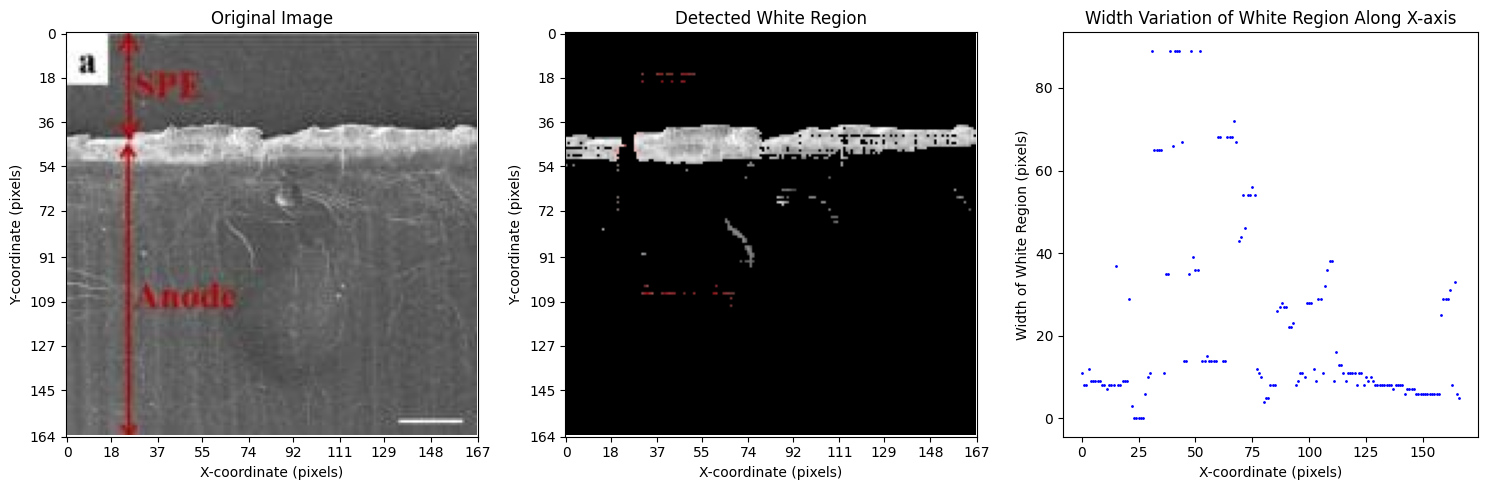

Width variation of the white region along the x-axis (in pixels):
[11.  8.  8. 12.  9.  9.  9.  9.  9.  8.  8.  7.  8.  8.  8. 37.  8.  8.
  9.  9.  9. 29.  3.  0.  0.  0.  0.  0.  6. 10. 11. 89. 65. 65. 65. 65.
 11. 35. 35. 89. 66. 89. 89. 89. 67. 14. 14. 35. 89. 39. 36. 36. 89. 14.
 14. 15. 14. 14. 14. 14. 68. 68. 14. 14. 68. 68. 68. 72. 67. 43. 44. 54.
 46. 54. 54. 56. 54. 12. 11. 10.  4.  5.  5.  8.  8.  8. 26. 27. 28. 27.
 27. 22. 22. 23.  8.  9. 11. 11. 10. 28. 28. 28. 12.  9. 29. 29. 11. 32.
 36. 38. 38.  9. 16. 13. 13. 11.  9. 11. 11. 11. 11.  8. 11. 11.  8. 10.
  9. 10.  9.  8.  8.  8.  8.  8.  8.  8.  8.  7.  8.  8.  8.  8.  6.  7.
  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6. 25. 29. 29. 29.
 31.  8. 33.  6.  5.]


In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 2: Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace with the correct path to the SAM model
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Step 3: Prepare the image for SAM
predictor.set_image(image)

# Step 4: Obtain segmentation masks
masks, _, _ = predictor.predict()

# Assume the first mask is the white region
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Step 5: Convert to grayscale to analyze the white region
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

# Step 6: Calculate the width of the white region along the x-axis
height, width = gray.shape
widths = np.zeros(width)

for x in range(width):
    column = gray[:, x]  # Extract column at x-coordinate
    white_pixels = np.where(column > 0)[0]  # Find white pixels in this column

    if white_pixels.size > 0:
        # Calculate width as difference between top and bottom of white pixels
        width_at_x = white_pixels[-1] - white_pixels[0]
        widths[x] = width_at_x
    else:
        widths[x] = 0  # No white region at this x-coordinate

# Step 7: Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Original Image with Pixel Axes
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(np.linspace(0, width, num=10, dtype=int))
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 2: Detected White Region with Pixel Axes
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(white_region, cv2.COLOR_BGR2RGB))
plt.title("Detected White Region")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(np.linspace(0, width, num=10, dtype=int))
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 3: Width Variation Along X-axis (Scatter Plot)
plt.subplot(1, 3, 3)
plt.scatter(range(width), widths, color='blue', s=1)  # Using scatter plot with small dots
plt.title("Width Variation of White Region Along X-axis")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width of White Region (pixels)")

# Show all plots
plt.tight_layout()
plt.show()

# Print calculated widths (optional)
print("Width variation of the white region along the x-axis (in pixels):")
print(widths)


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (6).jpeg


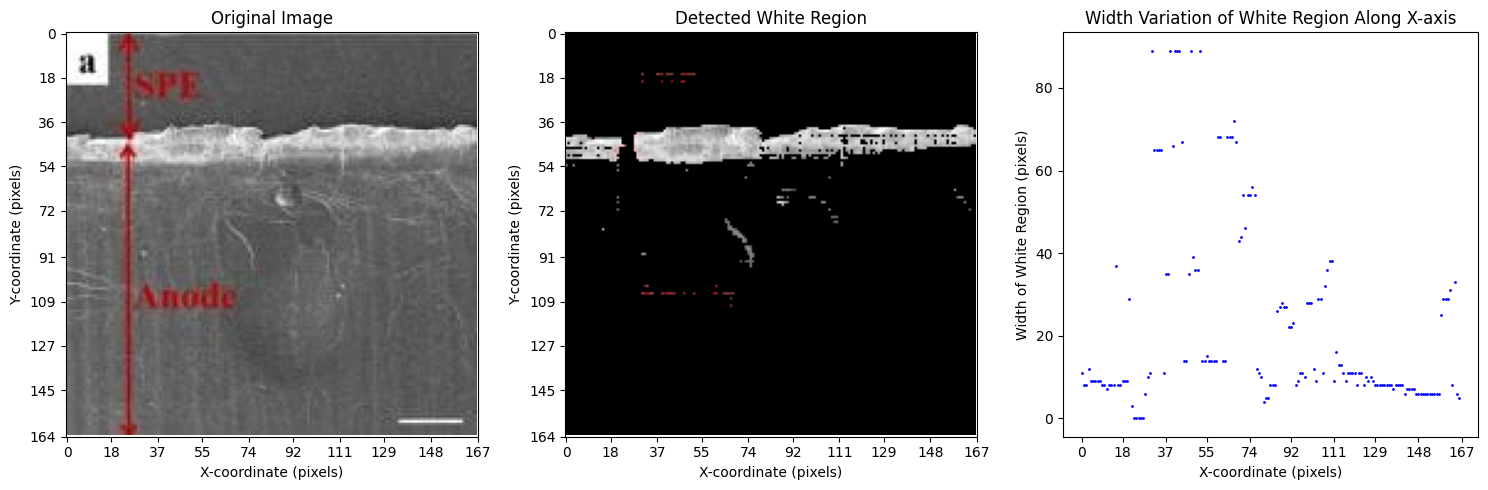

Width variation of the white region along the x-axis (in pixels):
[11.  8.  8. 12.  9.  9.  9.  9.  9.  8.  8.  7.  8.  8.  8. 37.  8.  8.
  9.  9.  9. 29.  3.  0.  0.  0.  0.  0.  6. 10. 11. 89. 65. 65. 65. 65.
 11. 35. 35. 89. 66. 89. 89. 89. 67. 14. 14. 35. 89. 39. 36. 36. 89. 14.
 14. 15. 14. 14. 14. 14. 68. 68. 14. 14. 68. 68. 68. 72. 67. 43. 44. 54.
 46. 54. 54. 56. 54. 12. 11. 10.  4.  5.  5.  8.  8.  8. 26. 27. 28. 27.
 27. 22. 22. 23.  8.  9. 11. 11. 10. 28. 28. 28. 12.  9. 29. 29. 11. 32.
 36. 38. 38.  9. 16. 13. 13. 11.  9. 11. 11. 11. 11.  8. 11. 11.  8. 10.
  9. 10.  9.  8.  8.  8.  8.  8.  8.  8.  8.  7.  8.  8.  8.  8.  6.  7.
  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6. 25. 29. 29. 29.
 31.  8. 33.  6.  5.]


In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 2: Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace with the correct path to the SAM model
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Step 3: Prepare the image for SAM
predictor.set_image(image)

# Step 4: Obtain segmentation masks
masks, _, _ = predictor.predict()

# Assume the first mask is the white region
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Step 5: Convert to grayscale to analyze the white region
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

# Step 6: Calculate the width of the white region along the x-axis
height, width = gray.shape
widths = np.zeros(width)

for x in range(width):
    column = gray[:, x]  # Extract column at x-coordinate
    white_pixels = np.where(column > 0)[0]  # Find white pixels in this column

    if white_pixels.size > 0:
        # Calculate width as difference between top and bottom of white pixels
        width_at_x = white_pixels[-1] - white_pixels[0]
        widths[x] = width_at_x
    else:
        widths[x] = 0  # No white region at this x-coordinate

# Set consistent x-axis ticks based on image width
x_ticks = np.linspace(0, width, num=10, dtype=int)

# Step 7: Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Original Image with Pixel Axes
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(x_ticks)
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 2: Detected White Region with Pixel Axes
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(white_region, cv2.COLOR_BGR2RGB))
plt.title("Detected White Region")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(x_ticks)
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 3: Width Variation Along X-axis (Scatter Plot)
plt.subplot(1, 3, 3)
plt.scatter(range(width), widths, color='blue', s=1)  # Using scatter plot with small dots
plt.title("Width Variation of White Region Along X-axis")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width of White Region (pixels)")
plt.xticks(x_ticks)

# Show all plots
plt.tight_layout()
plt.show()

# Print calculated widths (optional)
print("Width variation of the white region along the x-axis (in pixels):")
print(widths)


Saving blurred_image.png to blurred_image (1).png


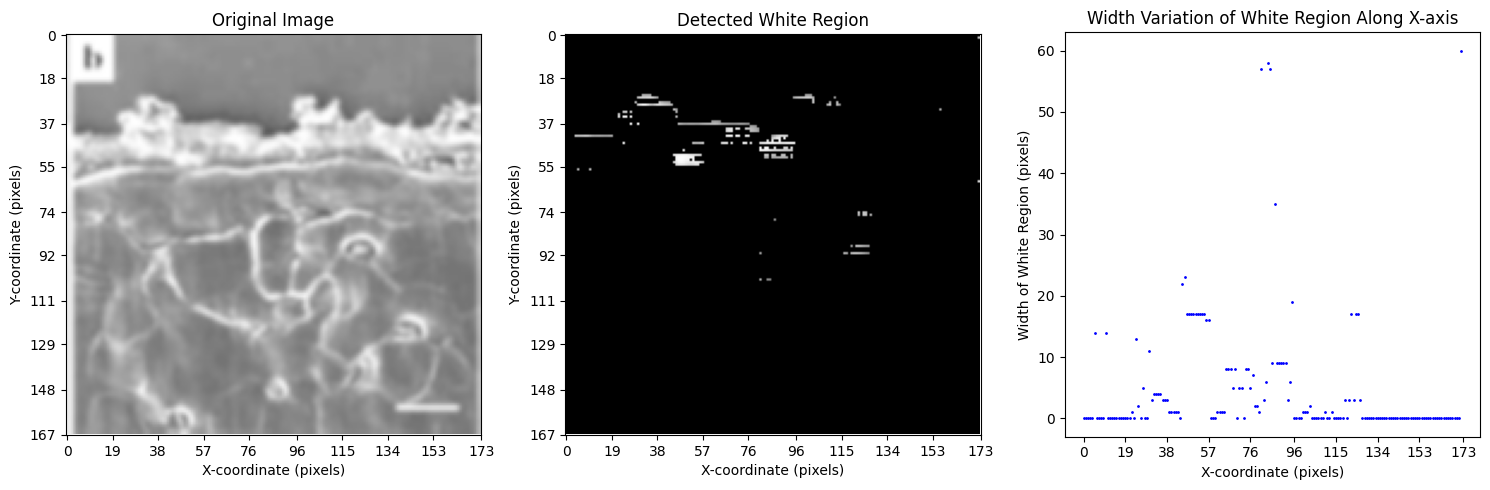

Width variation of the white region along the x-axis (in pixels):
[ 0.  0.  0.  0.  0. 14.  0.  0.  0.  0. 14.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0. 13.  2.  0.  5.  0.  0. 11.  3.  4.  4.  4.  4.
  3.  3.  3.  1.  1.  1.  1.  1.  0. 22. 23. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 16. 16.  0.  0.  0.  1.  1.  1.  1.  8.  8.  8.  5.  8.  0.  5.
  5.  0.  8.  8.  5.  7.  2.  2.  1. 57.  3.  6. 58. 57.  9. 35.  9.  9.
  9.  9.  9.  3.  6. 19.  0.  0.  0.  0.  1.  1.  1.  2.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  3.  0.  3. 17.  3. 17. 17.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 60.]


In [ ]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 2: Initialize SAM (Segment Anything Model)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace with the correct path to the SAM model
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Step 3: Prepare the image for SAM
predictor.set_image(image)

# Step 4: Obtain segmentation masks
masks, _, _ = predictor.predict()

# Assume the first mask is the white region
white_region_mask = masks[0]  # Assuming the first mask covers the white portion
white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

# Step 5: Convert to grayscale to analyze the white region
gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

# Step 6: Calculate the width of the white region along the x-axis
height, width = gray.shape
widths = np.zeros(width)

for x in range(width):
    column = gray[:, x]  # Extract column at x-coordinate
    white_pixels = np.where(column > 0)[0]  # Find white pixels in this column

    if white_pixels.size > 0:
        # Calculate width as difference between top and bottom of white pixels
        width_at_x = white_pixels[-1] - white_pixels[0]
        widths[x] = width_at_x
    else:
        widths[x] = 0  # No white region at this x-coordinate

# Set consistent x-axis ticks based on image width
x_ticks = np.linspace(0, width, num=10, dtype=int)

# Step 7: Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Original Image with Pixel Axes
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(x_ticks)
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 2: Detected White Region with Pixel Axes
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(white_region, cv2.COLOR_BGR2RGB))
plt.title("Detected White Region")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(x_ticks)
plt.yticks(np.linspace(0, height, num=10, dtype=int))

# Plot 3: Width Variation Along X-axis (Scatter Plot)
plt.subplot(1, 3, 3)
plt.scatter(range(width), widths, color='blue', s=1)  # Using scatter plot with small dots
plt.title("Width Variation of White Region Along X-axis")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width of White Region (pixels)")
plt.xticks(x_ticks)

# Show all plots
plt.tight_layout()
plt.show()

# Print calculated widths (optional)
print("Width variation of the white region along the x-axis (in pixels):")
print(widths)


Saving img3.jpeg to img3.jpeg


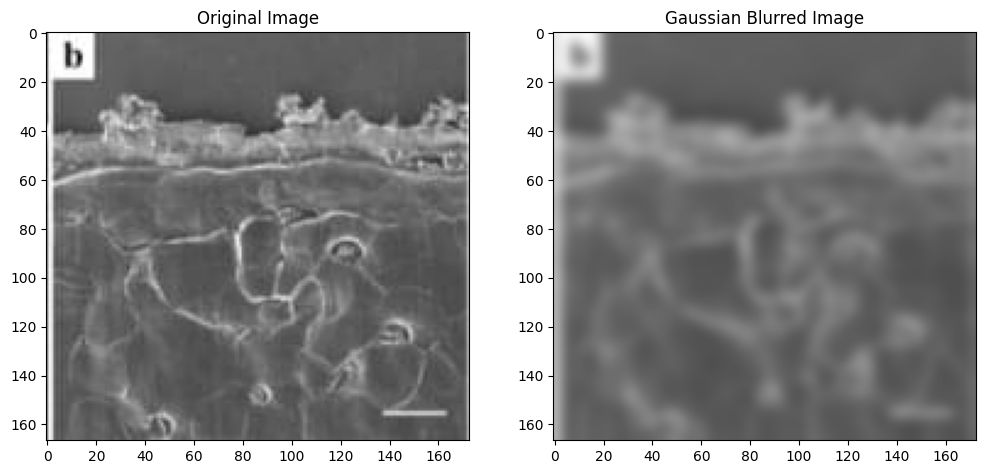

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image from local
uploaded = files.upload()

# Load the uploaded image
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

# Step 2: Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Apply Gaussian blur
# You can change the kernel size (e.g., (5, 5)) and standard deviation to adjust the blur
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Convert the blurred image to RGB for displaying with matplotlib
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Step 4: Display the original and blurred images side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('on')  # Display pixel markings

# Display the blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image_rgb)
plt.title("Gaussian Blurred Image")
plt.axis('on')  # Display pixel markings

plt.show()


Saving img3.jpeg to img3 (1).jpeg


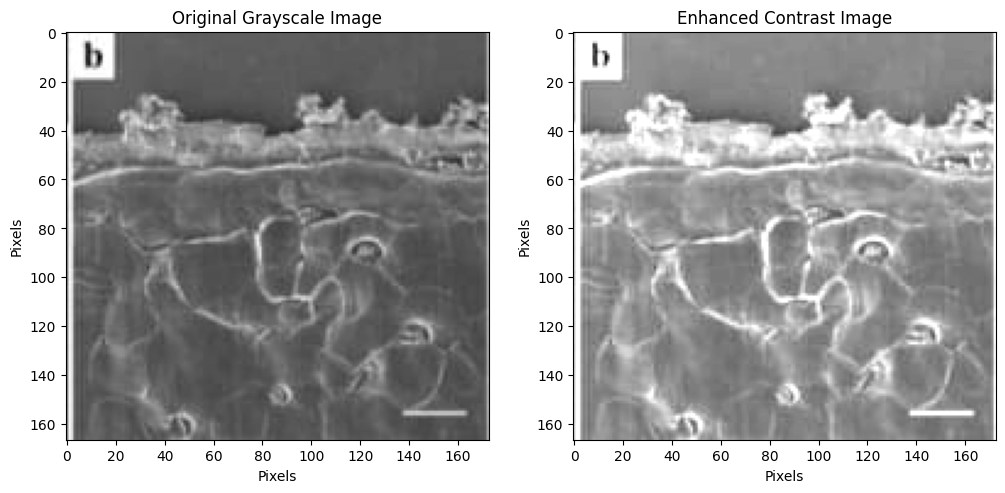

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to enhance the contrast of a grayscale image
def enhance_contrast_grayscale(image, alpha=1.5, beta=0):
    """
    Enhance the contrast of a grayscale image.

    Parameters:
        image (ndarray): Input image in grayscale format.
        alpha (float): Contrast control (1.0-3.0). Higher values enhance contrast more.
        beta (int): Brightness control (0-100). Increase to brighten the image.

    Returns:
        enhanced_image (ndarray): The contrast-enhanced grayscale image.
    """
    # Apply the contrast and brightness adjustment
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return enhanced_image

# Step 1: Upload the image from local
uploaded = files.upload()

# Load the uploaded image as grayscale
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_GRAYSCALE)

# Step 2: Enhance contrast
enhanced_image = enhance_contrast_grayscale(image)

# Step 3: Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

# Display the enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Contrast Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

plt.show()


Saving img3.jpeg to img3 (2).jpeg


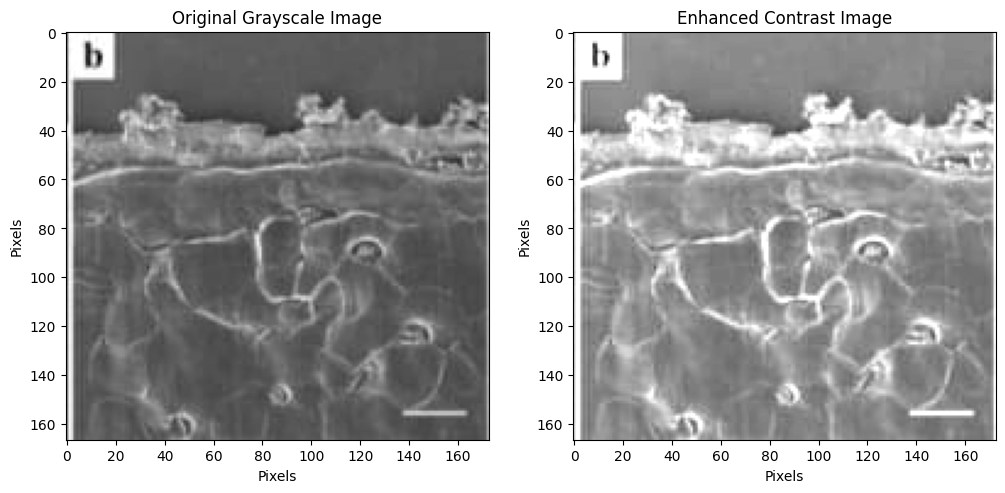

Download the enhanced image:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

# Function to enhance the contrast of a grayscale image
def enhance_contrast_grayscale(image, alpha=1.5, beta=0):
    """
    Enhance the contrast of a grayscale image.

    Parameters:
        image (ndarray): Input image in grayscale format.
        alpha (float): Contrast control (1.0-3.0). Higher values enhance contrast more.
        beta (int): Brightness control (0-100). Increase to brighten the image.

    Returns:
        enhanced_image (ndarray): The contrast-enhanced grayscale image.
    """
    # Apply the contrast and brightness adjustment
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return enhanced_image

# Step 1: Upload the image from local
uploaded = files.upload()

# Load the uploaded image as grayscale
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_GRAYSCALE)

# Step 2: Enhance contrast
enhanced_image = enhance_contrast_grayscale(image)

# Step 3: Save the enhanced image to a file
output_filename = 'enhanced_image.png'
cv2.imwrite(output_filename, enhanced_image)

# Step 4: Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

# Display the enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Contrast Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

plt.show()

# Step 5: Provide a download link
print("Download the enhanced image:")
files.download(output_filename)


Saving enhanced_image.png to enhanced_image (5).png


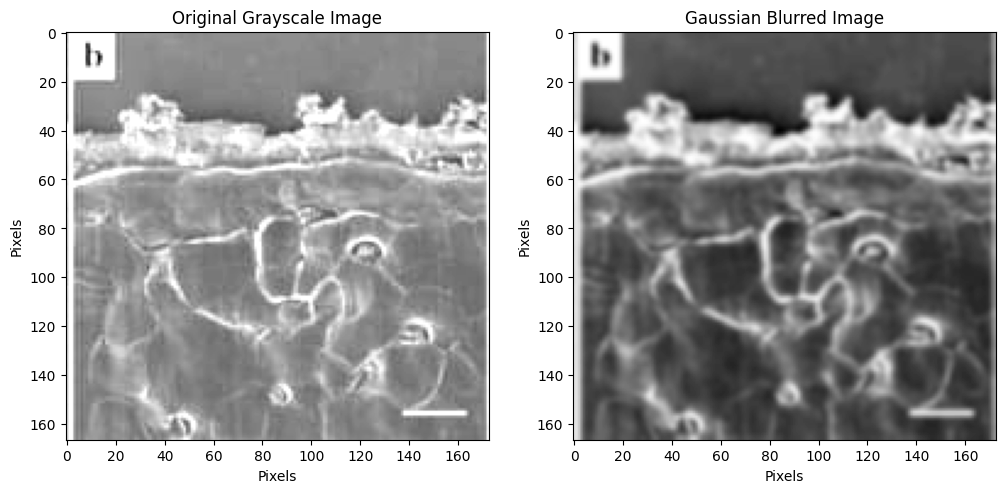

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to apply Gaussian blur to an image
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """
    Apply Gaussian blur to a grayscale image.

    Parameters:
        image (ndarray): Input image in grayscale format.
        kernel_size (tuple): Size of the Gaussian kernel (must be odd numbers).

    Returns:
        blurred_image (ndarray): The blurred image.
    """
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

# Step 1: Upload the image from local
uploaded = files.upload()

# Load the uploaded image as grayscale
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian blur
blurred_image = apply_gaussian_blur(image)

# Step 3: Display the original and blurred images side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

# Display the blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

plt.show()

# Step 4: Save and provide a download link for the blurred image
output_filename = 'blurred_image.png'
cv2.imwrite(output_filename, blurred_image)
files.download(output_filename)


Saving enhanced_image.png to enhanced_image (6).png


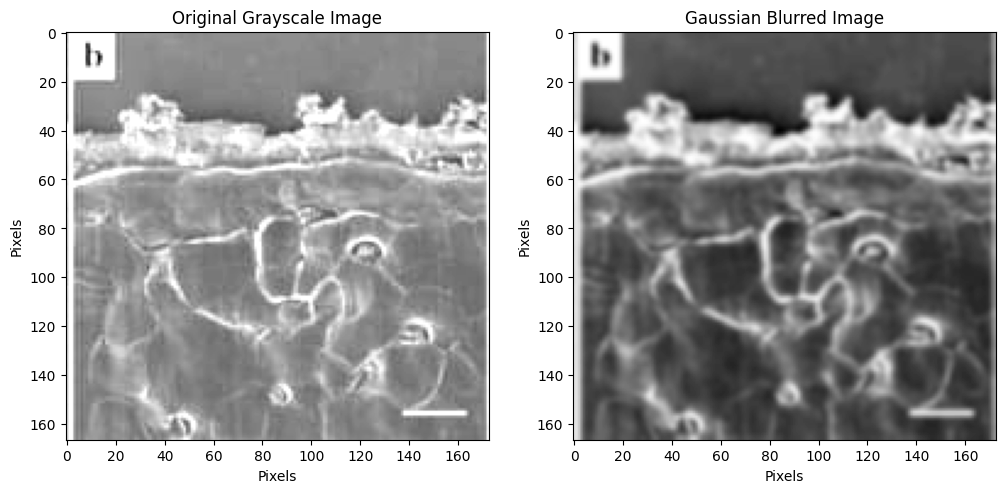

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to apply Gaussian blur to an image
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """
    Apply Gaussian blur to a grayscale image.

    Parameters:
        image (ndarray): Input image in grayscale format.
        kernel_size (tuple): Size of the Gaussian kernel (must be odd numbers).

    Returns:
        blurred_image (ndarray): The blurred image.
    """
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

# Step 1: Upload the image from local
uploaded = files.upload()

# Load the uploaded image as grayscale
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian blur
blurred_image = apply_gaussian_blur(image)

# Step 3: Display the original and blurred images side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

# Display the blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

plt.show()

# Step 4: Save the blurred image and provide a download link
output_filename = 'blurred_image.png'
cv2.imwrite(output_filename, blurred_image)  # Save the blurred image
files.download(output_filename)  # Download the saved image


Saving enhanced_image.png to enhanced_image (7).png


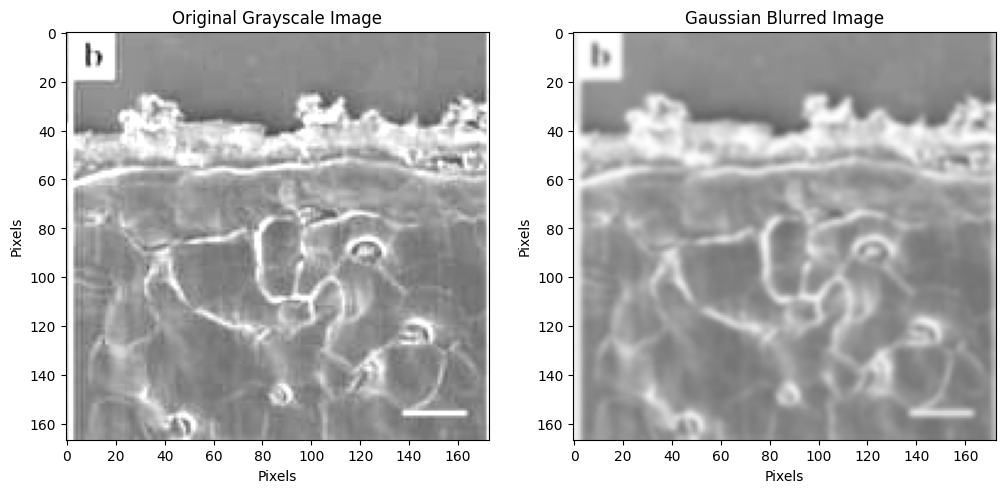

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to apply Gaussian blur to an image
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """
    Apply Gaussian blur to a grayscale image.

    Parameters:
        image (ndarray): Input image in grayscale format.
        kernel_size (tuple): Size of the Gaussian kernel (must be odd numbers).

    Returns:
        blurred_image (ndarray): The blurred image.
    """
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

# Step 1: Upload the image from local
uploaded = files.upload()

# Load the uploaded image as grayscale
for image_name in uploaded.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian blur
blurred_image = apply_gaussian_blur(image)

# Step 3: Display the original and blurred images side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original Grayscale Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

# Display the blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray', vmin=0, vmax=255)  # Ensure vmin and vmax are set
plt.title("Gaussian Blurred Image")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.axis('on')  # Display pixel markings

plt.show()

# Step 4: Save the blurred image and provide a download link
output_filename = 'blurred_image.png'
cv2.imwrite(output_filename, blurred_image)  # Save the blurred image
files.download(output_filename)  # Download the saved image


In [ ]:
#for the final image

In [ ]:
pip install torch torchvision
pip install opencv-python


SyntaxError: invalid syntax (<ipython-input-1-4b94deff33f2>, line 1)

Saving enhanced_image.png to enhanced_image (8).png
'blurred_image (1) (1).png'  'enhanced_image (1).png'  'enhanced_image (7).png'
'blurred_image (1) (2).png'  'enhanced_image (2).png'  'enhanced_image (8).png'
'blurred_image (1).png'      'enhanced_image (3).png'   enhanced_image.png
 blurred_image.png	     'enhanced_image (4).png'   img3.jpeg
 detected_edges_image.png    'enhanced_image (5).png'   sample_data
 drive			     'enhanced_image (6).png'   sam_vit_h_4b8939.pth


Saving enhanced_image.png to enhanced_image (9).png


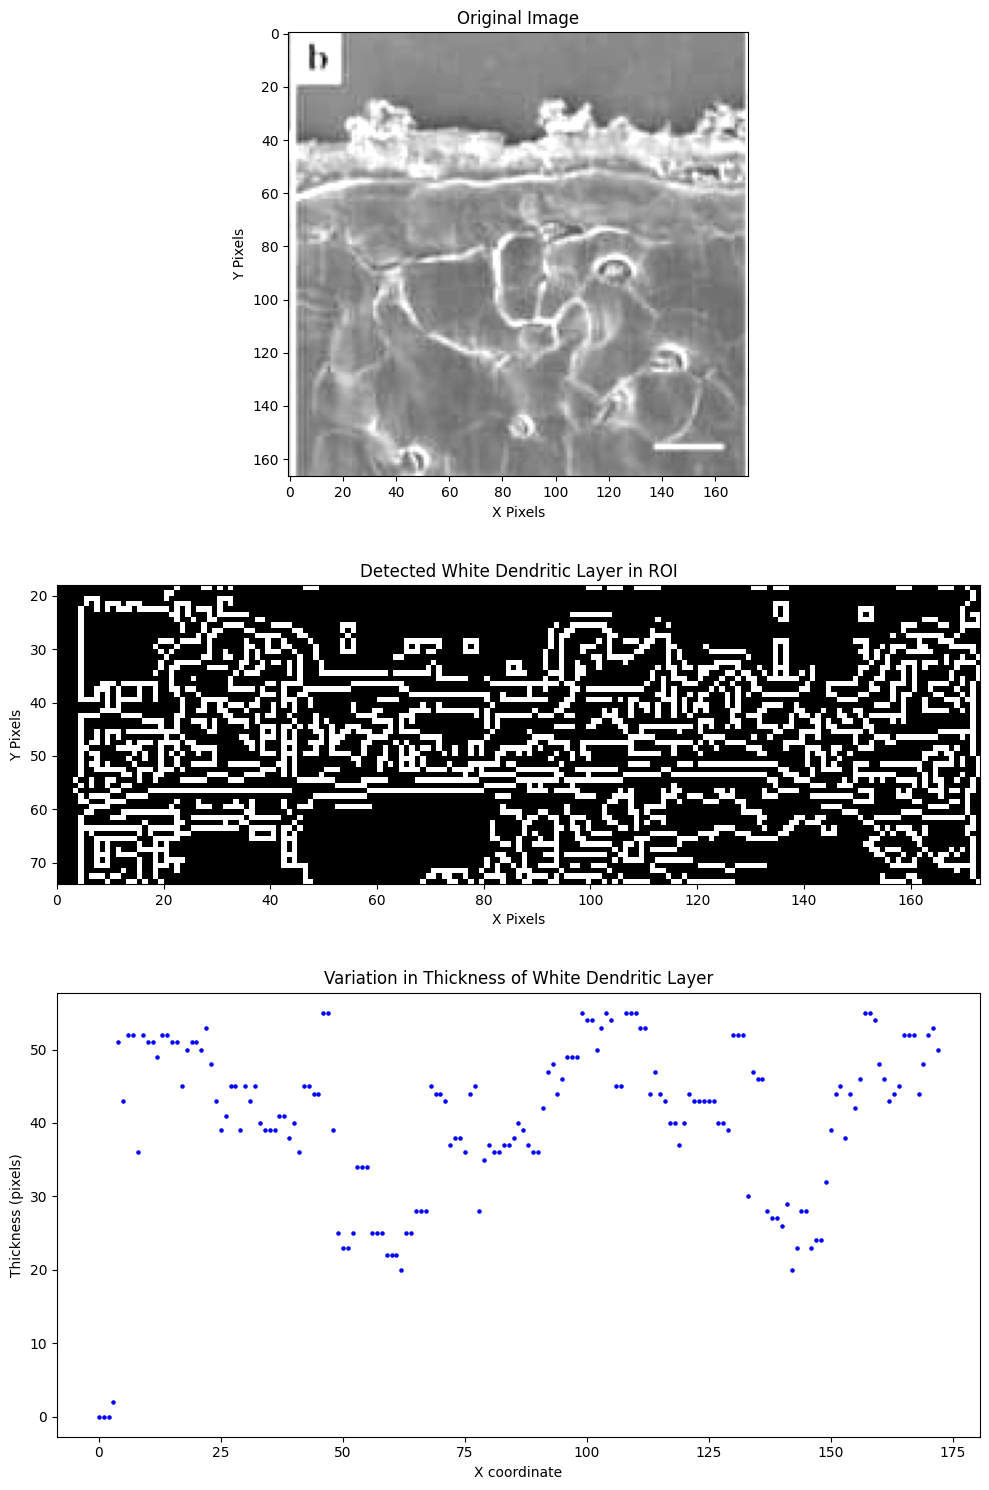

True

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
from google.colab import files

# Load SAM model (assuming you downloaded the model checkpoint)
# Step 1: Upload the SAM model checkpoint in Google Colab
uploaded_checkpoint = files.upload()  # Upload 'sam_vit_h_4b8939.pth'
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace this if the file name is different

# Verify that the file is uploaded and list files in the current directory
!ls

# Load the SAM model checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Step 2: Upload the target image from local
uploaded_image = files.upload()  # Upload your target image

# Load the uploaded image and check if it is grayscale or color
for image_name in uploaded_image.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded_image[image_name], np.uint8), cv2.IMREAD_UNCHANGED)

# If the image is grayscale, convert it to RGB
if len(image.shape) == 2:  # Single channel (grayscale)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
else:
    image_rgb = image  # Already in color

# Run SAM model to predict segmentation
predictor.set_image(image_rgb)
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    mask_input=None,
    multimask_output=False
)
mask = masks[0]  # Assume single mask is returned

# Apply mask to extract the white dendritic region
masked_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

# Define region of interest (ROI) between y=18 and y=74 pixels
y_min, y_max = 18, 74
roi = masked_image[y_min:y_max, :]

# Edge detection to find boundaries of the white region
edges = cv2.Canny(roi, threshold1=50, threshold2=150)

# Initialize list to store thickness values
thickness_values = []

# Iterate over each column (x-coordinate) to measure thickness
for x in range(edges.shape[1]):
    # Get non-zero pixel indices (white pixels) in the column
    column = edges[:, x]
    white_pixels = np.where(column > 0)[0]

    # Calculate thickness if there are white pixels
    if len(white_pixels) > 1:
        thickness = white_pixels[-1] - white_pixels[0]
        thickness_values.append(thickness)
    else:
        thickness_values.append(0)  # No white pixels, thickness is 0

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot original image
axs[0].imshow(image, cmap='gray' if len(image.shape) == 2 else None)
axs[0].set_title("Original Image")
axs[0].set_xlabel("X Pixels")
axs[0].set_ylabel("Y Pixels")

# Plot ROI with detected edges
axs[1].imshow(edges, cmap='gray', extent=[0, edges.shape[1], y_max, y_min])
axs[1].set_title("Detected White Dendritic Layer in ROI")
axs[1].set_xlabel("X Pixels")
axs[1].set_ylabel("Y Pixels")

# Scatter plot of thickness variation
x_coords = range(edges.shape[1])
axs[2].scatter(x_coords, thickness_values, s=5, color='blue')
axs[2].set_title("Variation in Thickness of White Dendritic Layer")
axs[2].set_xlabel("X coordinate")
axs[2].set_ylabel("Thickness (pixels)")

plt.tight_layout()
plt.show()

# Step 4: Save and provide a download link for the edge-detected image
output_filename = 'detected_edges_image.png'
cv2.imwrite(output_filename, edges)
# files.download(output_filename)


Saving img3.jpeg to img3.jpeg
drive  img3.jpeg  sample_data  sam_vit_h_4b8939.pth


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Saving blurred_image (1).png to blurred_image (1).png


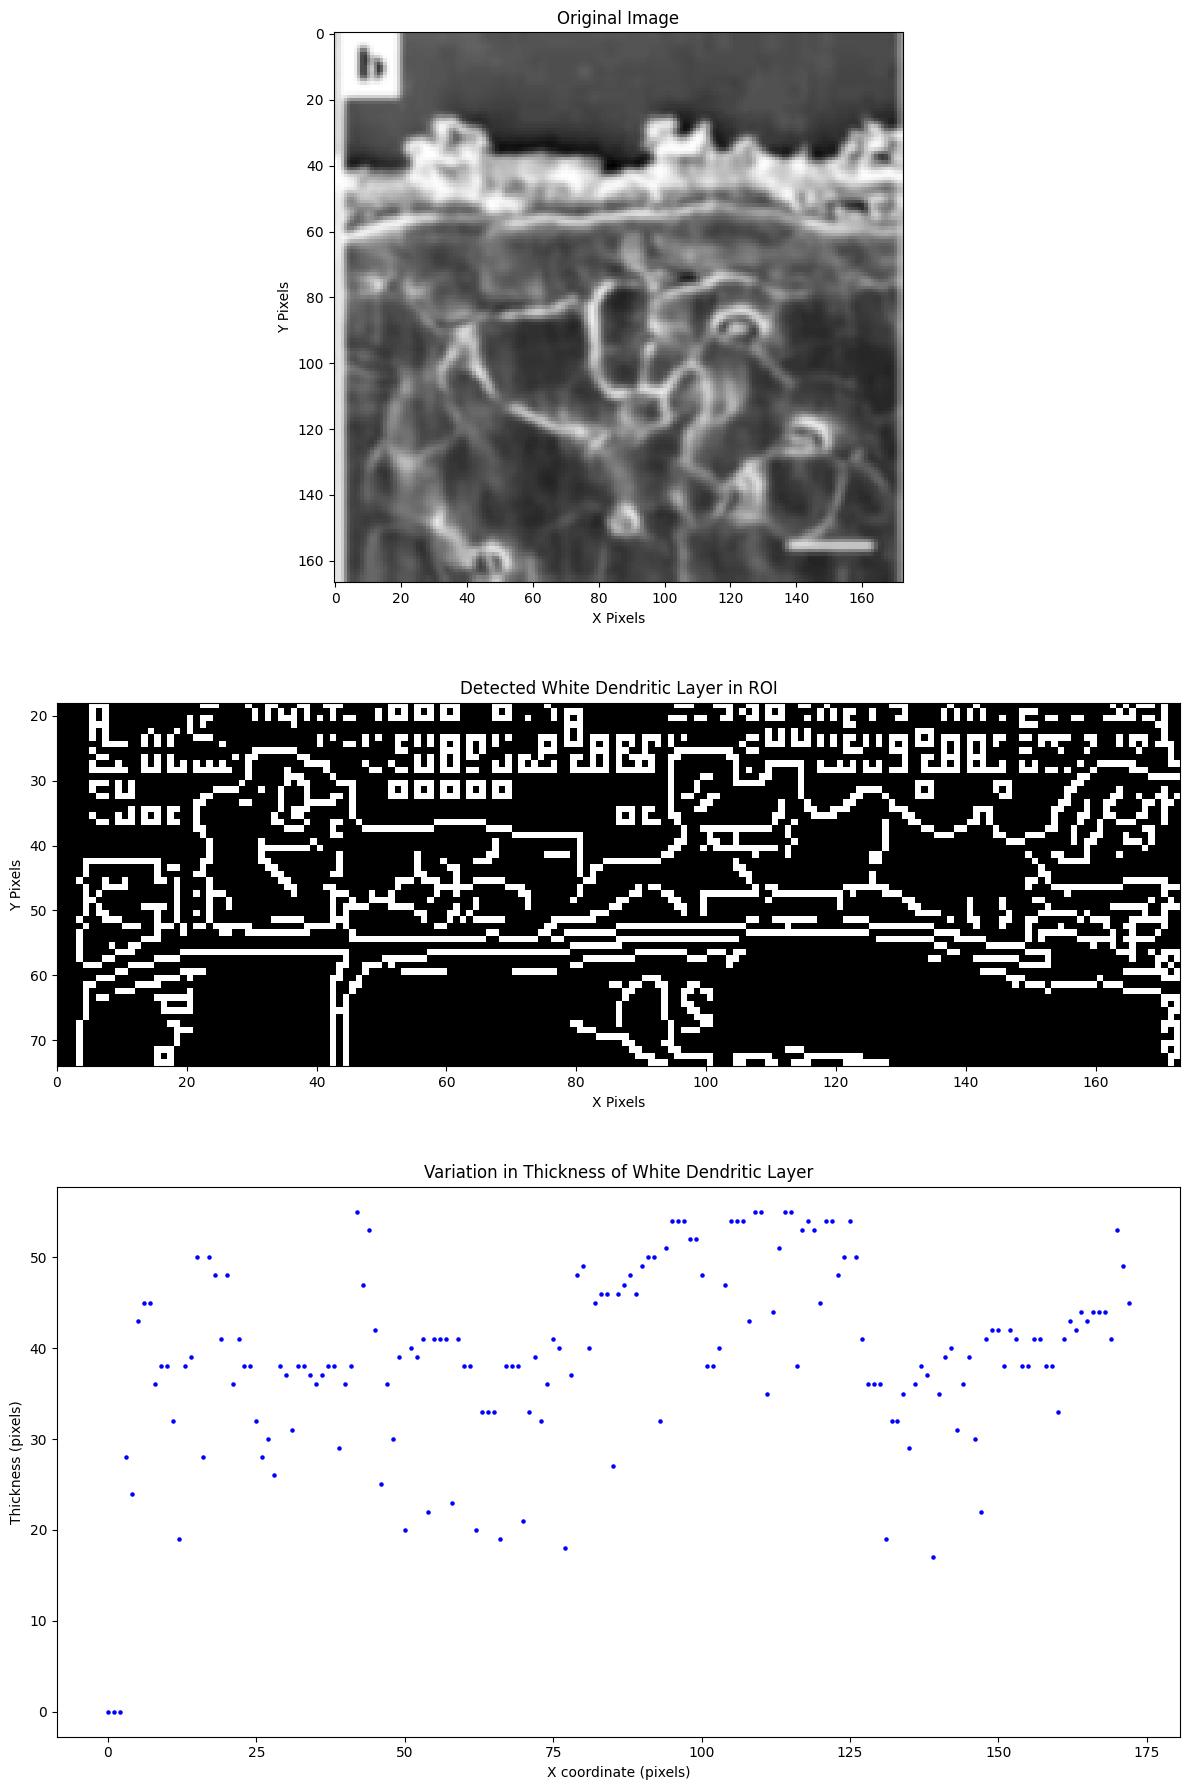

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
from google.colab import files

# Load SAM model (assuming you downloaded the model checkpoint)
# Step 1: Upload the SAM model checkpoint in Google Colab
uploaded_checkpoint = files.upload()  # Upload 'sam_vit_h_4b8939.pth'
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Replace this if the file name is different

# Verify that the file is uploaded and list files in the current directory
!ls

# Load the SAM model checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Step 2: Upload the target image from local
uploaded_image = files.upload()  # Upload your target image

# Load the uploaded image and check if it is grayscale or color
for image_name in uploaded_image.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded_image[image_name], np.uint8), cv2.IMREAD_UNCHANGED)

# If the image is grayscale, convert it to RGB
if len(image.shape) == 2:  # Single channel (grayscale)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
else:
    image_rgb = image  # Already in color

# Run SAM model to predict segmentation
predictor.set_image(image_rgb)
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    mask_input=None,
    multimask_output=False
)
mask = masks[0]  # Assume single mask is returned

# Apply mask to extract the white dendritic region
masked_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

# Define region of interest (ROI) between y=18 and y=74 pixels
y_min, y_max = 18, 74
roi = masked_image[y_min:y_max, :]

# Edge detection to find boundaries of the white region
edges = cv2.Canny(roi, threshold1=50, threshold2=150)

# Initialize list to store thickness values and y-coordinates of edges
thickness_values = []
y_variation = []

# Iterate over each column (x-coordinate) to measure thickness and detect edge y-coordinates
for x in range(edges.shape[1]):
    # Get non-zero pixel indices (white pixels) in the column
    column = edges[:, x]
    white_pixels = np.where(column > 0)[0]

    # Calculate thickness and y-coordinates
    if len(white_pixels) > 1:
        thickness = white_pixels[-1] - white_pixels[0]
        thickness_values.append(thickness)
        y_variation.append((white_pixels[0] + white_pixels[-1]) // 2)
    else:
        thickness_values.append(0)  # No white pixels, thickness is 0
        y_variation.append(None)  # No edge detected at this x

# Filter out None values from y_variation
x_coords = range(edges.shape[1])
y_variation_filtered = [y for y in y_variation if y is not None]

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot original image with x, y pixel labels
axs[0].imshow(image, cmap='gray' if len(image.shape) == 2 else None)
axs[0].set_title("Original Image")
axs[0].set_xlabel("X Pixels")
axs[0].set_ylabel("Y Pixels")

# Plot ROI with detected edges, consistent x-axis
axs[1].imshow(edges, cmap='gray', extent=[0, edges.shape[1], y_max, y_min])
axs[1].set_title("Detected White Dendritic Layer in ROI")
axs[1].set_xlabel("X Pixels")
axs[1].set_ylabel("Y Pixels")

# Scatter plot of thickness variation along x-axis
axs[2].scatter(x_coords, thickness_values, s=5, color='blue')
axs[2].set_title("Variation in Thickness of White Dendritic Layer")
axs[2].set_xlabel("X coordinate (pixels)")
axs[2].set_ylabel("Thickness (pixels)")

plt.tight_layout()
plt.show()

# Step 4: Save and provide a download link for the processed edge-detected image
output_filename = 'detected_edges_image.png'
cv2.imwrite(output_filename, edges)

# Download the image
files.download(output_filename)

# Print the variation of y-coordinates for the detected white edge
print("Variation of Y along X (in pixels):")
print(y_variation_filtered)


Please upload your SAM model checkpoint (e.g., 'sam_vit_h_4b8939.pth'):


Saving img3.jpeg to img3 (2).jpeg
Uploaded file: img3 (2).jpeg
File size: 4896 bytes
Error loading the checkpoint: invalid load key, '\xff'.
Attempting to download the SAM model from the official source...


<ipython-input-7-a91ce74da6e1>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(sam_checkpoint, map_location='cpu')


--2024-11-11 03:36:25--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   237MB/s    in 19s     

2024-11-11 03:36:44 (129 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



<ipython-input-7-a91ce74da6e1>:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(sam_checkpoint, map_location='cpu')


Downloaded SAM model loaded successfully!
Please upload your target image:


Saving enhanced_image.png to enhanced_image.png


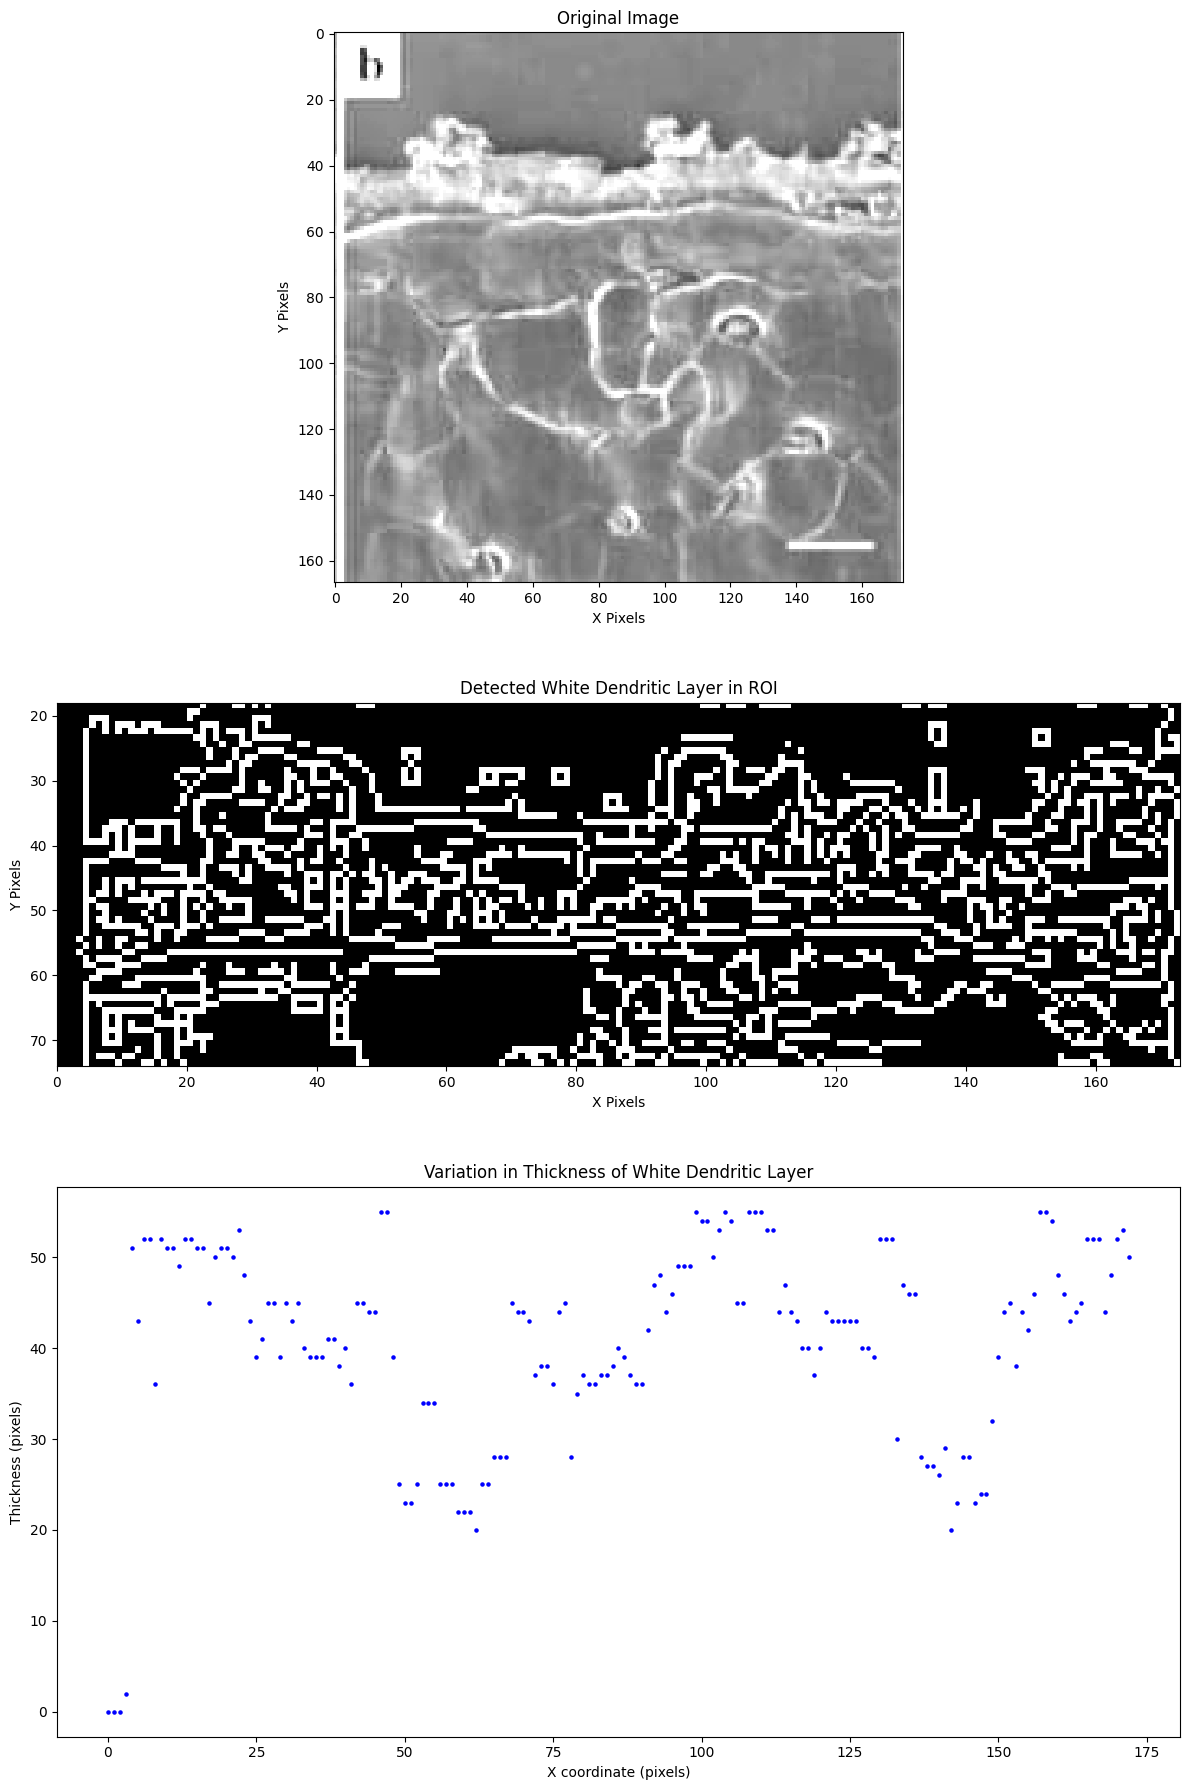

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Width variation of the white region along the x-axis (in pixels):
[0, 0, 0, 2, 51, 43, 52, 52, 36, 52, 51, 51, 49, 52, 52, 51, 51, 45, 50, 51, 51, 50, 53, 48, 43, 39, 41, 45, 45, 39, 45, 43, 45, 40, 39, 39, 39, 41, 41, 38, 40, 36, 45, 45, 44, 44, 55, 55, 39, 25, 23, 23, 25, 34, 34, 34, 25, 25, 25, 22, 22, 22, 20, 25, 25, 28, 28, 28, 45, 44, 44, 43, 37, 38, 38, 36, 44, 45, 28, 35, 37, 36, 36, 37, 37, 38, 40, 39, 37, 36, 36, 42, 47, 48, 44, 46, 49, 49, 49, 55, 54, 54, 50, 53, 55, 54, 45, 45, 55, 55, 55, 53, 53, 44, 47, 44, 43, 40, 40, 37, 40, 44, 43, 43, 43, 43, 43, 40, 40, 39, 52, 52, 52, 30, 47, 46, 46, 28, 27, 27, 26, 29, 20, 23, 28, 28, 23, 24, 24, 32, 39, 44, 45, 38, 44, 42, 46, 55, 55, 54, 48, 46, 43, 44, 45, 52, 52, 52, 44, 48, 52, 53, 50]


In [7]:
# Import necessary libraries
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
from google.colab import files
import os

# Step 1: Upload the SAM model checkpoint file
print("Please upload your SAM model checkpoint (e.g., 'sam_vit_h_4b8939.pth'):")
uploaded_checkpoint = files.upload()  # Upload 'sam_vit_h_4b8939.pth'

# Get the uploaded filename
sam_checkpoint = list(uploaded_checkpoint.keys())[0] if uploaded_checkpoint else None

# Verify the uploaded file
if sam_checkpoint and os.path.exists(sam_checkpoint):
    print(f"Uploaded file: {sam_checkpoint}")
    print(f"File size: {os.path.getsize(sam_checkpoint)} bytes")
else:
    print("No valid file uploaded. Please try again.")
    raise ValueError("SAM checkpoint file upload failed.")

# Step 2: Check if the uploaded file is a valid PyTorch checkpoint
try:
    torch.load(sam_checkpoint, map_location='cpu')
    print("Checkpoint loaded successfully!")
except Exception as e:
    print(f"Error loading the checkpoint: {e}")
    print("Attempting to download the SAM model from the official source...")

    # Download SAM model from the official source as a fallback
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O sam_vit_h_4b8939.pth
    sam_checkpoint = "sam_vit_h_4b8939.pth"

    # Retry loading the model
    try:
        torch.load(sam_checkpoint, map_location='cpu')
        print("Downloaded SAM model loaded successfully!")
    except Exception as e:
        print(f"Failed to load SAM model even after downloading: {e}")
        raise RuntimeError("Could not load the SAM model.")

# Load the SAM model
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Step 3: Upload the target image from local
print("Please upload your target image:")
uploaded_image = files.upload()  # Upload your target image

# Load the uploaded image
if not uploaded_image:
    raise ValueError("Image upload failed. Please upload a valid image.")

for image_name in uploaded_image.keys():
    image_path = image_name
    image = cv2.imdecode(np.frombuffer(uploaded_image[image_name], np.uint8), cv2.IMREAD_UNCHANGED)

# Check if the image is grayscale or color
if len(image.shape) == 2:  # Single channel (grayscale)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
else:
    image_rgb = image  # Already in color

# Run SAM model to predict segmentation
predictor.set_image(image_rgb)
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    mask_input=None,
    multimask_output=False
)
mask = masks[0]  # Assume single mask is returned

# Apply mask to extract the white dendritic region
masked_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

# Define region of interest (ROI) between y=18 and y=74 pixels
y_min, y_max = 18, 74
roi = masked_image[y_min:y_max, :]

# Edge detection to find boundaries of the white region
edges = cv2.Canny(roi, threshold1=50, threshold2=150)

# Initialize list to store thickness values and y-coordinates of edges
thickness_values = []
y_variation = []

# Iterate over each column (x-coordinate) to measure thickness and detect edge y-coordinates
for x in range(edges.shape[1]):
    # Get non-zero pixel indices (white pixels) in the column
    column = edges[:, x]
    white_pixels = np.where(column > 0)[0]

    # Calculate thickness and y-coordinates
    if len(white_pixels) > 1:
        thickness = white_pixels[-1] - white_pixels[0]
        thickness_values.append(thickness)
        y_variation.append((white_pixels[0] + white_pixels[-1]) // 2)
    else:
        thickness_values.append(0)  # No white pixels, thickness is 0
        y_variation.append(None)  # No edge detected at this x

# Filter out None values from y_variation
x_coords = range(edges.shape[1])
y_variation_filtered = [y for y in y_variation if y is not None]

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot original image with x, y pixel labels
axs[0].imshow(image, cmap='gray' if len(image.shape) == 2 else None)
axs[0].set_title("Original Image")
axs[0].set_xlabel("X Pixels")
axs[0].set_ylabel("Y Pixels")

# Plot ROI with detected edges, consistent x-axis
axs[1].imshow(edges, cmap='gray', extent=[0, edges.shape[1], y_max, y_min])
axs[1].set_title("Detected White Dendritic Layer in ROI")
axs[1].set_xlabel("X Pixels")
axs[1].set_ylabel("Y Pixels")

# Scatter plot of thickness variation along x-axis
axs[2].scatter(x_coords, thickness_values, s=5, color='blue')
axs[2].set_title("Variation in Thickness of White Dendritic Layer")
axs[2].set_xlabel("X coordinate (pixels)")
axs[2].set_ylabel("Thickness (pixels)")

plt.tight_layout()
plt.show()

# Step 4: Save and provide a download link for the processed edge-detected image
output_filename = 'detected_edges_image.png'
cv2.imwrite(output_filename, edges)

# Download the image
files.download(output_filename)

# Print the variation of y-coordinates for the detected white edge
print("Width variation of the white region along the x-axis (in pixels):")
print(thickness_values)


Using local SAM model checkpoint: sam_vit_h_4b8939.pth
File size: 2564550879 bytes
Please upload the OLD image:


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51.jpeg
Please upload the NEW image:


Saving img3.jpeg to img3 (4).jpeg


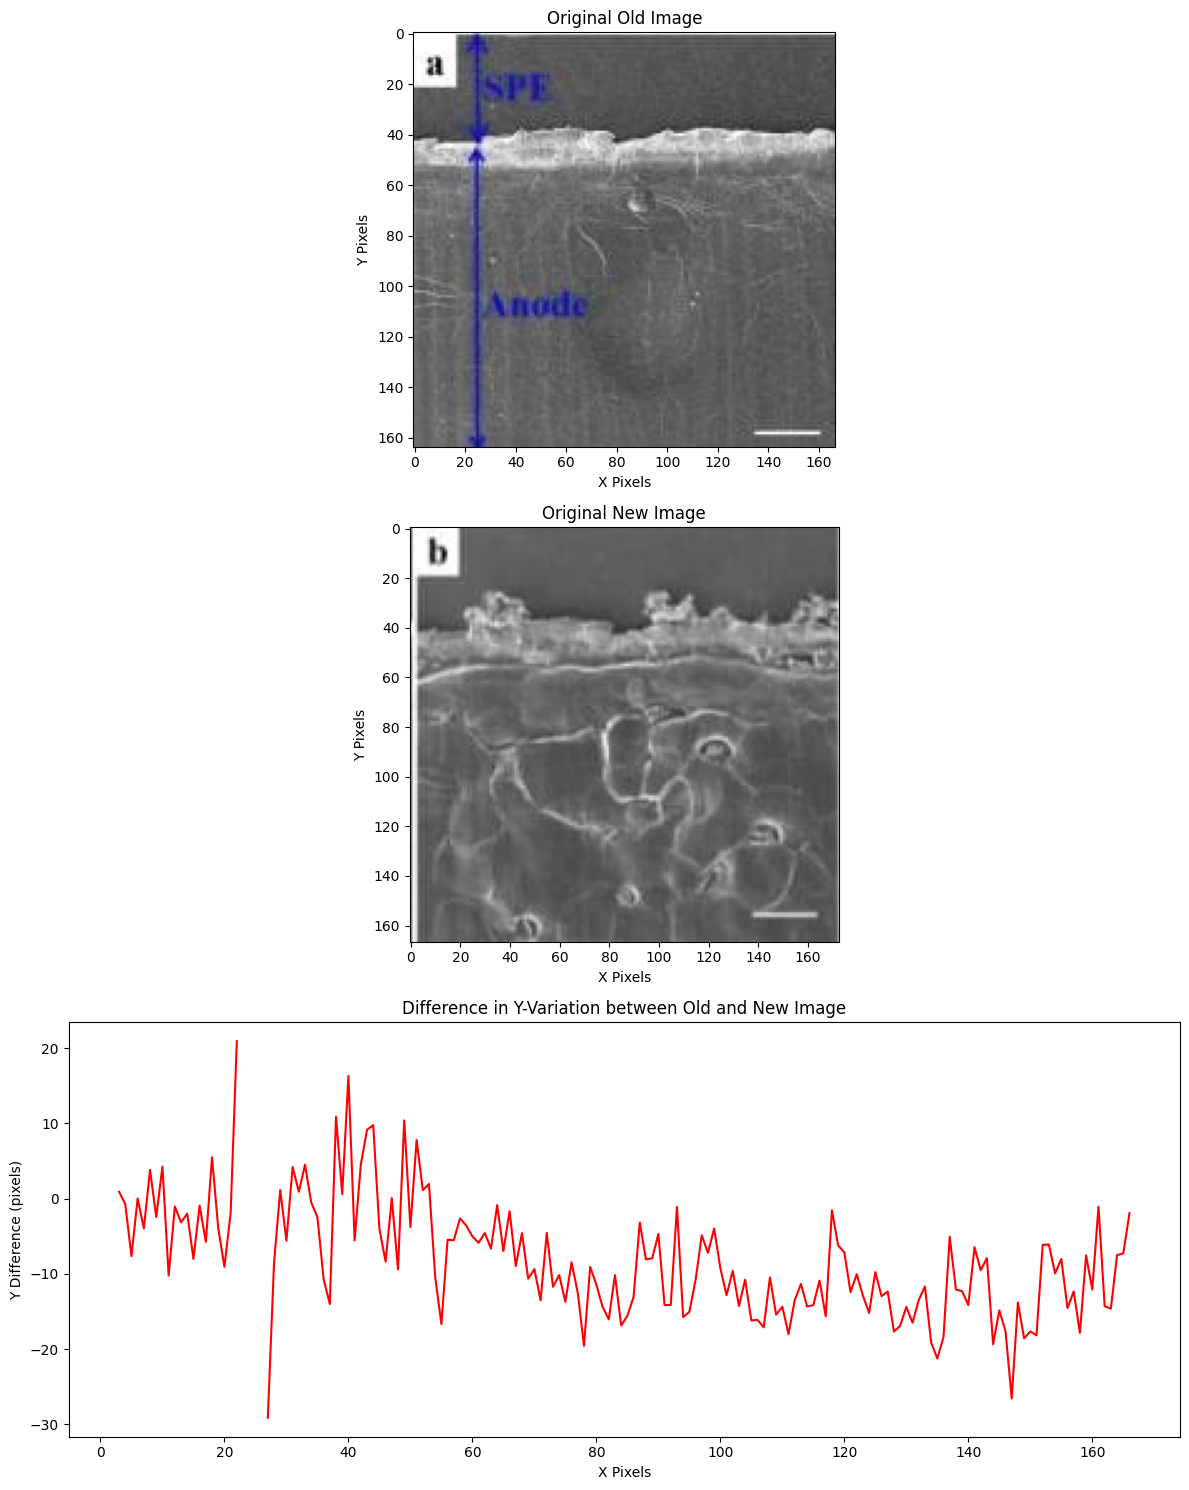

Y-variation difference along the x-axis:
[None, None, None, 0.9090909090909065, -0.7145299145299155, -7.642105263157898, 0.015151515151515582, -3.948616600790512, 3.819444444444443, -2.442028985507246, 4.257142857142856, -10.229166666666668, -1.05555555555555, -3.1566666666666663, -1.9911764705882327, -8.015686274509804, -0.9257142857142853, -5.74404761904762, 5.487394957983195, -3.9337231968810933, -9.066666666666666, -1.9479674796747979, 20.92105263157895, None, None, None, None, -29.13333333333333, -8.557142857142857, 1.125, -5.5882352941176485, 4.203619909502265, 0.9144385026737964, 4.5, -0.5, -2.466666666666665, -10.6875, -14.0, 10.898809523809526, 0.5974025974025956, 16.294117647058822, -5.551282051282051, 4.510526315789473, 9.142857142857142, 9.765714285714285, -4.0, -8.384615384615383, 0.060439560439562, -9.409523809523808, 10.39366515837104, -3.7777777777777786, 7.784313725490197, 1.1181818181818173, 1.94736842105263, -10.416666666666668, -16.666666666666664, -5.46923076923076

In [9]:
# Import necessary libraries
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
import os

# Step 1: Define the path to the locally saved SAM model checkpoint
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Path to your locally saved SAM model

# Verify the path to the SAM model checkpoint
if os.path.exists(sam_checkpoint):
    print(f"Using local SAM model checkpoint: {sam_checkpoint}")
    print(f"File size: {os.path.getsize(sam_checkpoint)} bytes")
else:
    print("SAM model checkpoint not found at the specified location.")

# Load the SAM model
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Step 2: Upload two images (Old and New)
print("Please upload the OLD image:")
uploaded_old = files.upload()
old_image_name = list(uploaded_old.keys())[0]
old_image = cv2.imdecode(np.frombuffer(uploaded_old[old_image_name], np.uint8), cv2.IMREAD_UNCHANGED)

print("Please upload the NEW image:")
uploaded_new = files.upload()
new_image_name = list(uploaded_new.keys())[0]
new_image = cv2.imdecode(np.frombuffer(uploaded_new[new_image_name], np.uint8), cv2.IMREAD_UNCHANGED)

# Convert grayscale images to RGB if needed
def convert_to_rgb(image):
    if len(image.shape) == 2:
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image

old_image_rgb = convert_to_rgb(old_image)
new_image_rgb = convert_to_rgb(new_image)

# Function to process an image, apply segmentation, and extract y-variation
def process_image(image_rgb):
    # Run SAM model to predict segmentation
    predictor.set_image(image_rgb)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        mask_input=None,
        multimask_output=False
    )
    mask = masks[0]

    # Apply mask to extract the white dendritic region
    masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask.astype(np.uint8))

    # Define region of interest (ROI)
    y_min, y_max = 18, 74  # Adjust ROI as per the requirement
    roi = masked_image[y_min:y_max, :]

    # Convert ROI to grayscale for edge detection
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    # Edge detection to find boundaries of the white region
    edges = cv2.Canny(roi_gray, threshold1=50, threshold2=150)

    # Initialize lists to store y-coordinates of edges
    y_variation = []

    # Iterate over each column (x-coordinate) to detect edge y-coordinates
    for x in range(edges.shape[1]):
        column = edges[:, x]
        white_pixels = np.where(column > 0)[0]

        # Store the average y-coordinate of the white region for this column
        if len(white_pixels) > 0:
            avg_y = np.mean(white_pixels)
            y_variation.append(avg_y)
        else:
            y_variation.append(None)  # No edge found

    return y_variation

# Process both old and new images
old_y_variation = process_image(old_image_rgb)
new_y_variation = process_image(new_image_rgb)

# Step 3: Calculate the difference in y-variation
x_coords = range(len(old_y_variation))
y_diff = [
    (new_y - old_y) if new_y is not None and old_y is not None else None
    for new_y, old_y in zip(new_y_variation, old_y_variation)
]

# Step 4: Plot the results
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot original old image
axs[0].imshow(old_image, cmap='gray' if len(old_image.shape) == 2 else None)
axs[0].set_title("Original Old Image")
axs[0].set_xlabel("X Pixels")
axs[0].set_ylabel("Y Pixels")

# Plot original new image
axs[1].imshow(new_image, cmap='gray' if len(new_image.shape) == 2 else None)
axs[1].set_title("Original New Image")
axs[1].set_xlabel("X Pixels")
axs[1].set_ylabel("Y Pixels")

# Plot difference in y-variation
axs[2].plot(x_coords, y_diff, color='red')
axs[2].set_title("Difference in Y-Variation between Old and New Image")
axs[2].set_xlabel("X Pixels")
axs[2].set_ylabel("Y Difference (pixels)")

plt.tight_layout()
plt.show()

# Print the y-difference values
print("Y-variation difference along the x-axis:")
print(y_diff)


Please upload the 'old' image:


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (2).jpeg
Please upload the 'new' image:


Saving img3.jpeg to img3 (6).jpeg


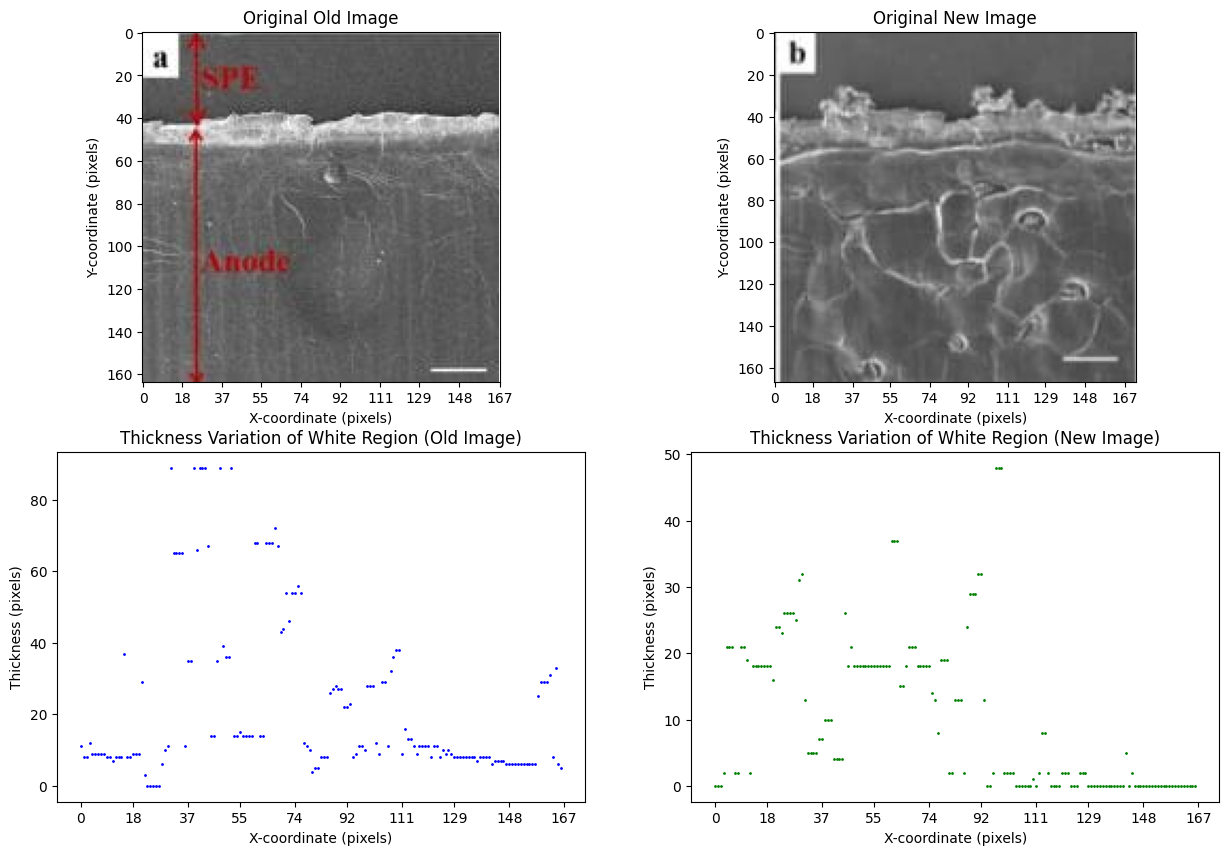

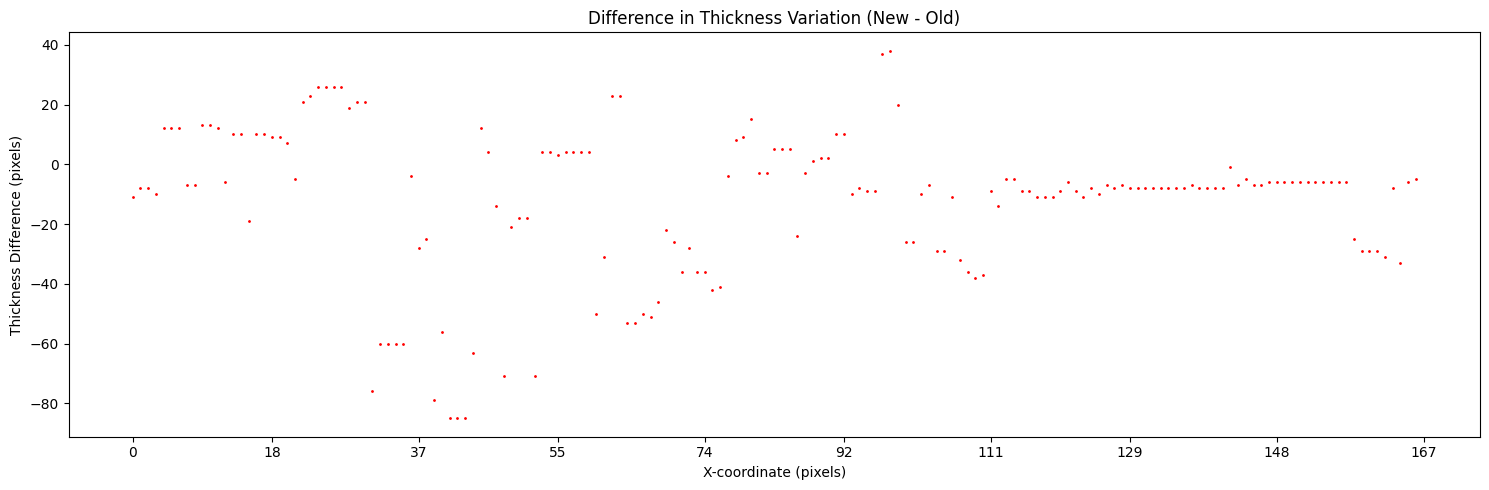

Difference in thickness variation of the white region along the x-axis (in pixels):
[-11.  -8.  -8. -10.  12.  12.  12.  -7.  -7.  13.  13.  12.  -6.  10.
  10. -19.  10.  10.   9.   9.   7.  -5.  21.  23.  26.  26.  26.  26.
  19.  21.  21. -76. -60. -60. -60. -60.  -4. -28. -25. -79. -56. -85.
 -85. -85. -63.  12.   4. -14. -71. -21. -18. -18. -71.   4.   4.   3.
   4.   4.   4.   4. -50. -31.  23.  23. -53. -53. -50. -51. -46. -22.
 -26. -36. -28. -36. -36. -42. -41.  -4.   8.   9.  15.  -3.  -3.   5.
   5.   5. -24.  -3.   1.   2.   2.  10.  10. -10.  -8.  -9.  -9.  37.
  38.  20. -26. -26. -10.  -7. -29. -29. -11. -32. -36. -38. -37.  -9.
 -14.  -5.  -5.  -9.  -9. -11. -11. -11.  -9.  -6.  -9. -11.  -8. -10.
  -7.  -8.  -7.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -7.  -8.  -8.
  -8.  -8.  -1.  -7.  -5.  -7.  -7.  -6.  -6.  -6.  -6.  -6.  -6.  -6.
  -6.  -6.  -6.  -6. -25. -29. -29. -29. -31.  -8. -33.  -6.  -5.]


In [11]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the images (old and new)
print("Please upload the 'old' image:")
uploaded_old = files.upload()
print("Please upload the 'new' image:")
uploaded_new = files.upload()

# Load the uploaded images
old_image = None
new_image = None
for image_name in uploaded_old.keys():
    old_image = cv2.imdecode(np.frombuffer(uploaded_old[image_name], np.uint8), cv2.IMREAD_COLOR)
for image_name in uploaded_new.keys():
    new_image = cv2.imdecode(np.frombuffer(uploaded_new[image_name], np.uint8), cv2.IMREAD_COLOR)

# Ensure that both images are loaded
if old_image is None or new_image is None:
    raise ValueError("Both 'old' and 'new' images need to be uploaded.")

# Step 2: Set up device and load SAM model
device = "cuda" if torch.cuda.is_available() else "cpu"
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Path to SAM checkpoint
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

def process_old_image(image):
    """
    Process the old image by directly calculating the white region's width along the x-axis.
    """
    # Prepare image and predict segmentation
    predictor.set_image(image)
    masks, _, _ = predictor.predict()
    white_region_mask = masks[0]  # Assuming the first mask covers the white region
    white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

    # Convert to grayscale
    gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

    # Calculate width of the white region for each x-coordinate
    height, width = gray.shape
    widths = np.zeros(width)

    for x in range(width):
        column = gray[:, x]
        white_pixels = np.where(column > 0)[0]  # Find positions of white pixels
        widths[x] = white_pixels[-1] - white_pixels[0] if white_pixels.size > 0 else 0  # Calculate width

    return widths

def process_new_image(image):
    """
    Process the new image with region of interest (ROI) and edge detection to calculate thickness.
    """
    # Prepare image and predict segmentation
    predictor.set_image(image)
    masks, _, _ = predictor.predict()
    white_region_mask = masks[0]
    white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)

    # Define region of interest (ROI) between y=18 and y=74 pixels
    y_min, y_max = 18, 74
    roi = white_region[y_min:y_max, :]

    # Edge detection to find boundaries of the white region
    edges = cv2.Canny(roi, threshold1=50, threshold2=150)

    # Calculate thickness of white region at each x-coordinate within the ROI
    height, width = edges.shape
    thickness_values = np.zeros(width)

    for x in range(width):
        column = edges[:, x]
        white_pixels = np.where(column > 0)[0]
        thickness_values[x] = white_pixels[-1] - white_pixels[0] if len(white_pixels) > 1 else 0  # Thickness

    return thickness_values

# Step 4: Process both images with their respective logics
old_widths = process_old_image(old_image)
new_thickness = process_new_image(new_image)

# Step 5: Adjust lengths by truncating to the shorter array length
min_length = min(len(old_widths), len(new_thickness))
old_widths = old_widths[:min_length]
new_thickness = new_thickness[:min_length]

# Calculate the difference in thickness variation along the x-axis
thickness_diff = new_thickness - old_widths

# Step 6: Plot results
width = len(old_widths)
x_ticks = np.linspace(0, width, num=10, dtype=int)

plt.figure(figsize=(15, 10))

# Plot 1: Original Old Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB))
plt.title("Original Old Image")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(x_ticks)

# Plot 2: Original New Image
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title("Original New Image")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Y-coordinate (pixels)")
plt.xticks(x_ticks)

# Plot 3: Thickness Variation for Old Image
plt.subplot(2, 2, 3)
plt.scatter(range(width), old_widths, color='blue', s=1)
plt.title("Thickness Variation of White Region (Old Image)")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Thickness (pixels)")
plt.xticks(x_ticks)

# Plot 4: Thickness Variation for New Image
plt.subplot(2, 2, 4)
plt.scatter(range(width), new_thickness, color='green', s=1)
plt.title("Thickness Variation of White Region (New Image)")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Thickness (pixels)")
plt.xticks(x_ticks)

# Plot 5: Difference in Thickness Variation
plt.figure(figsize=(15, 5))
plt.scatter(range(width), thickness_diff, color='red', s=1)
plt.title("Difference in Thickness Variation (New - Old)")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Thickness Difference (pixels)")
plt.xticks(x_ticks)

plt.tight_layout()
plt.show()

# Print the calculated width difference (optional)
print("Difference in thickness variation of the white region along the x-axis (in pixels):")
print(thickness_diff)


Please upload your 'old' image:


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (5).jpeg
Please upload your 'new' image:


Saving img3.jpeg to img3 (9).jpeg


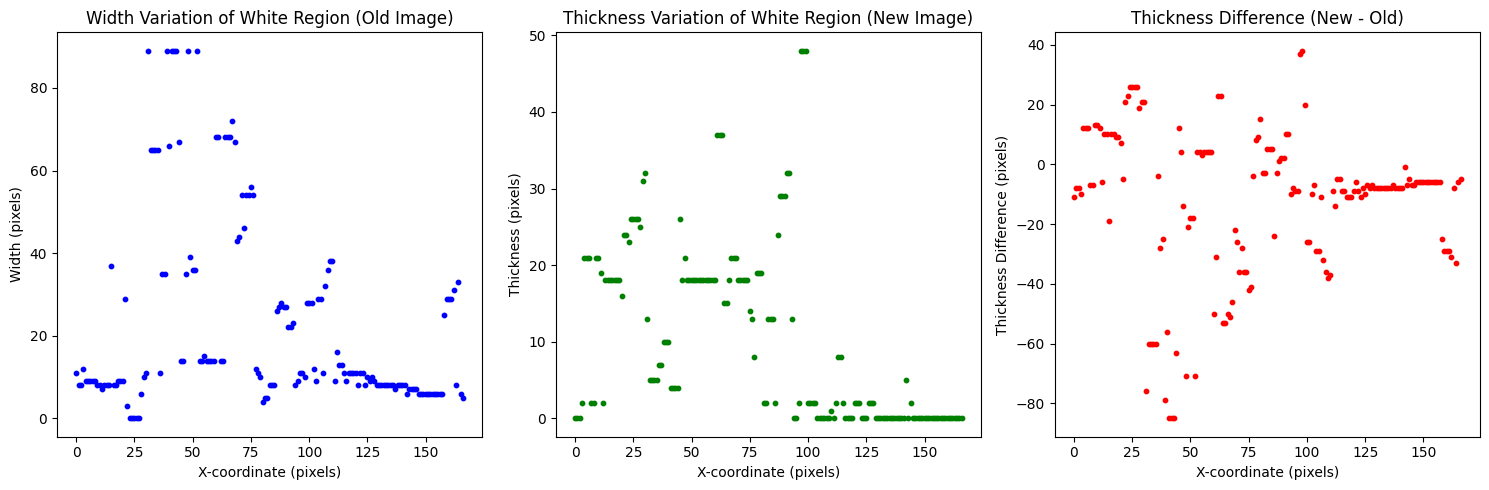

Old Image Width Variation: [11.  8.  8. 12.  9.  9.  9.  9.  9.  8.  8.  7.  8.  8.  8. 37.  8.  8.
  9.  9.  9. 29.  3.  0.  0.  0.  0.  0.  6. 10. 11. 89. 65. 65. 65. 65.
 11. 35. 35. 89. 66. 89. 89. 89. 67. 14. 14. 35. 89. 39. 36. 36. 89. 14.
 14. 15. 14. 14. 14. 14. 68. 68. 14. 14. 68. 68. 68. 72. 67. 43. 44. 54.
 46. 54. 54. 56. 54. 12. 11. 10.  4.  5.  5.  8.  8.  8. 26. 27. 28. 27.
 27. 22. 22. 23.  8.  9. 11. 11. 10. 28. 28. 28. 12.  9. 29. 29. 11. 32.
 36. 38. 38.  9. 16. 13. 13. 11.  9. 11. 11. 11. 11.  8. 11. 11.  8. 10.
  9. 10.  9.  8.  8.  8.  8.  8.  8.  8.  8.  7.  8.  8.  8.  8.  6.  7.
  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6. 25. 29. 29. 29.
 31.  8. 33.  6.  5.]
Thickness Difference (New - Old): [-11.  -8.  -8. -10.  12.  12.  12.  -7.  -7.  13.  13.  12.  -6.  10.
  10. -19.  10.  10.   9.   9.   7.  -5.  21.  23.  26.  26.  26.  26.
  19.  21.  21. -76. -60. -60. -60. -60.  -4. -28. -25. -79. -56. -85.
 -85. -85. -63.  12.   4. -14. -71. -21. -18. -

In [15]:
# Import necessary libraries
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# Initialize SAM model directly without needing to upload a checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Assuming the SAM checkpoint is already accessible
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Step 1: Upload both images
print("Please upload your 'old' image:")
uploaded_old_image = files.upload()
print("Please upload your 'new' image:")
uploaded_new_image = files.upload()

# Load the uploaded images
old_image = cv2.imdecode(np.frombuffer(next(iter(uploaded_old_image.values())), np.uint8), cv2.IMREAD_COLOR)
new_image = cv2.imdecode(np.frombuffer(next(iter(uploaded_new_image.values())), np.uint8), cv2.IMREAD_COLOR)

# Function to process the old image
def process_old_image(image):
    predictor.set_image(image)
    masks, _, _ = predictor.predict()
    white_region_mask = masks[0]  # Assuming first mask is white region
    white_region = cv2.bitwise_and(image, image, mask=white_region_mask.astype(np.uint8) * 255)
    gray = cv2.cvtColor(white_region, cv2.COLOR_BGR2GRAY)

    # Calculate width variation across the x-axis
    height, width = gray.shape
    widths = np.zeros(width)
    for x in range(width):
        column = gray[:, x]
        white_pixels = np.where(column > 0)[0]
        widths[x] = white_pixels[-1] - white_pixels[0] if white_pixels.size > 0 else 0
    return widths

# Function to process the new image
def process_new_image(image):
    predictor.set_image(image)
    masks, _, _ = predictor.predict()
    mask = masks[0]
    masked_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

    # Define ROI for white dendritic layer
    y_min, y_max = 18, 74
    roi = masked_image[y_min:y_max, :]
    edges = cv2.Canny(roi, threshold1=50, threshold2=150)

    # Measure thickness across x-axis
    thickness_values = []
    for x in range(edges.shape[1]):
        column = edges[:, x]
        white_pixels = np.where(column > 0)[0]
        if len(white_pixels) > 1:
            thickness = white_pixels[-1] - white_pixels[0]
            thickness_values.append(thickness)
        else:
            thickness_values.append(0)
    return thickness_values

# Step 2: Process both images and calculate thickness difference
old_widths = process_old_image(old_image)
new_thickness = process_new_image(new_image)

# Ensure arrays have the same length for comparison
min_length = min(len(old_widths), len(new_thickness))
old_widths = old_widths[:min_length]
new_thickness = new_thickness[:min_length]
thickness_diff = np.array(new_thickness) - np.array(old_widths)

# Plot results
plt.figure(figsize=(15, 5))

# Plot 1: Width variation in old image (Scatter Plot)
plt.subplot(1, 3, 1)
plt.scatter(range(len(old_widths)), old_widths, color='blue', s=10)
plt.title("Width Variation of White Region (Old Image)")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Width (pixels)")

# Plot 2: Thickness variation in new image (Scatter Plot)
plt.subplot(1, 3, 2)
plt.scatter(range(len(new_thickness)), new_thickness, color='green', s=10)
plt.title("Thickness Variation of White Region (New Image)")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Thickness (pixels)")

# Plot 3: Difference in thickness (Scatter Plot)
plt.subplot(1, 3, 3)
plt.scatter(range(len(thickness_diff)), thickness_diff, color='red', s=10)
plt.title("Thickness Difference (New - Old)")
plt.xlabel("X-coordinate (pixels)")
plt.ylabel("Thickness Difference (pixels)")

plt.tight_layout()
plt.show()

# Print the calculated width variation and thickness difference (optional)
print("Old Image Width Variation:", old_widths)
print("Thickness Difference (New - Old):", thickness_diff)


Model checkpoint found: sam_vit_h_4b8939.pth
File size: 2564550879 bytes
Please upload the old image:


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (7).jpeg
Please upload the new image:


Saving img3.jpeg to img3 (10).jpeg


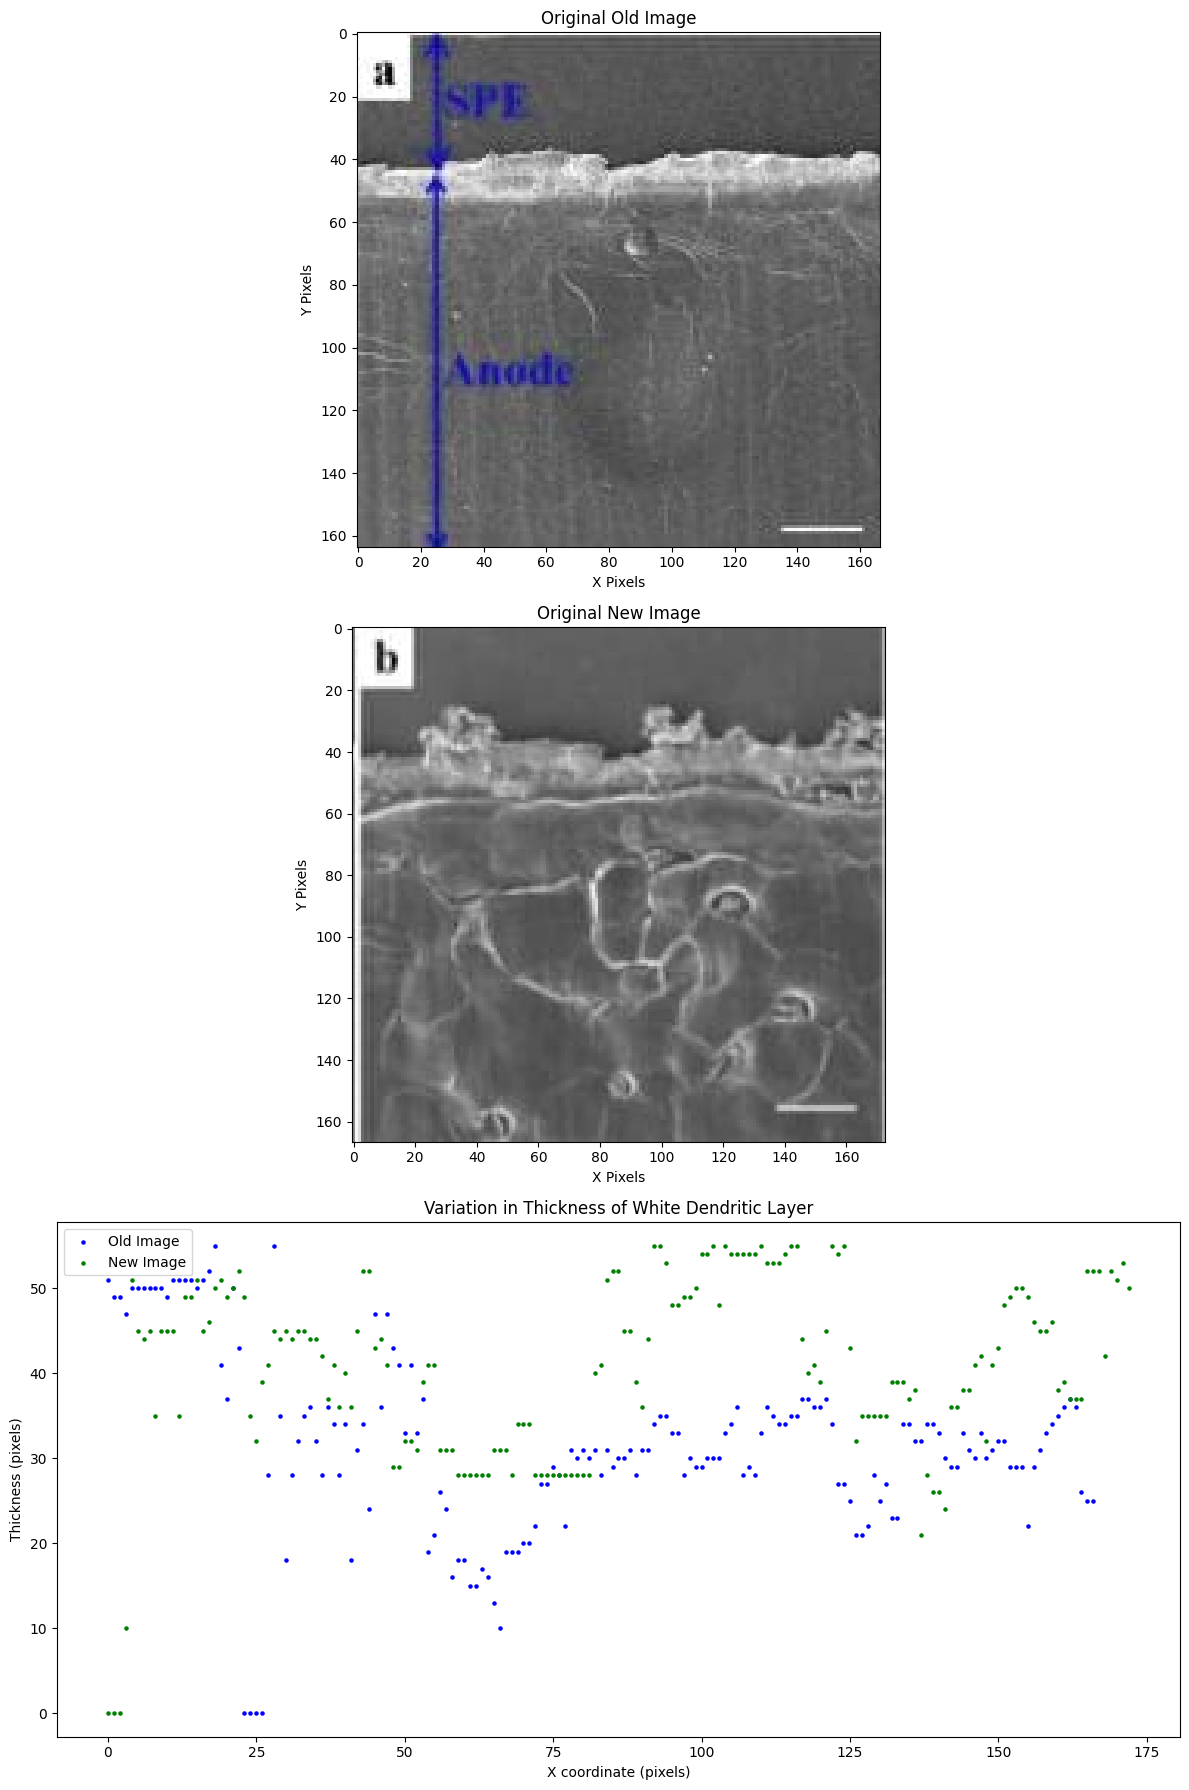

Differences in thickness between the old and new images (in pixels):
[-51, -49, -49, -37, 1, -5, -6, -5, -15, -5, -4, -6, -16, -2, -2, 1, -6, -6, -5, 10, 12, 0, 9, 49, 35, 32, 39, 13, -10, 9, 27, 16, 13, 10, 8, 12, 14, 1, 7, 8, 6, 18, 14, 18, 28, -4, 8, -6, -14, -12, -1, -9, -2, 2, 22, 20, 5, 7, 15, 10, 10, 13, 13, 11, 12, 18, 21, 12, 9, 15, 14, 14, 6, 1, 1, -1, 0, 6, -3, -2, -3, -2, 9, 13, 20, 23, 22, 15, 14, 11, 5, 13, 21, 20, 18, 15, 15, 21, 19, 21, 25, 24, 25, 18, 22, 20, 18, 26, 25, 26, 22, 17, 18, 19, 20, 20, 20, 7, 3, 5, 3, 8, 21, 27, 28, 18, 11, 14, 13, 7, 10, 8, 16, 16, 5, 3, 6, -11, -6, -8, -7, -6, 7, 7, 5, 7, 11, 9, 2, 10, 11, 16, 20, 21, 21, 27, 17, 14, 12, 12, 3, 3, 0, 1, 11, 27, 27, None, None, None, None, None, None]


In [22]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
from google.colab import files
import os

# Step 1: Load the SAM model checkpoint file
sam_checkpoint = 'sam_vit_h_4b8939.pth'  # Specify the path to the downloaded model

# Verify the uploaded file
if os.path.exists(sam_checkpoint):
    print(f"Model checkpoint found: {sam_checkpoint}")
    print(f"File size: {os.path.getsize(sam_checkpoint)} bytes")
else:
    raise ValueError("SAM model checkpoint file not found. Please ensure it's located correctly.")

# Step 2: Load the SAM model
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Function to process image and compute thickness values
def process_image(image, y_min=18, y_max=74):
    # Run SAM model to predict segmentation
    predictor.set_image(image)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        mask_input=None,
        multimask_output=False
    )
    mask = masks[0]  # Assume single mask is returned

    # Apply mask to extract the white dendritic region
    masked_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

    # Define region of interest (ROI) between y=18 and y=74 pixels
    roi = masked_image[y_min:y_max, :]

    # Edge detection to find boundaries of the white region
    edges = cv2.Canny(roi, threshold1=50, threshold2=150)

    # Initialize list to store thickness values and y-coordinates of edges
    thickness_values = []
    y_variation = []

    # Iterate over each column (x-coordinate) to measure thickness and detect edge y-coordinates
    for x in range(edges.shape[1]):
        # Get non-zero pixel indices (white pixels) in the column
        column = edges[:, x]
        white_pixels = np.where(column > 0)[0]

        # Calculate thickness and y-coordinates
        if len(white_pixels) > 1:
            thickness = white_pixels[-1] - white_pixels[0]
            thickness_values.append(thickness)
            y_variation.append((white_pixels[0] + white_pixels[-1]) // 2)
        else:
            thickness_values.append(0)  # No white pixels, thickness is 0
            y_variation.append(None)  # No edge detected at this x

    return thickness_values

# Step 2: Upload the old image
print("Please upload the old image:")
uploaded_old_image = files.upload()  # Upload the old image

# Load the old image
old_image = None
for image_name in uploaded_old_image.keys():
    image_path = image_name
    old_image = cv2.imdecode(np.frombuffer(uploaded_old_image[image_name], np.uint8), cv2.IMREAD_UNCHANGED)

if old_image is None:
    raise ValueError("Old image upload failed. Please upload a valid old image.")

# Check if the old image is grayscale or color
def convert_to_rgb(image):
    if len(image.shape) == 2:  # Single channel (grayscale)
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        return image  # Already in color

old_image_rgb = convert_to_rgb(old_image)

# Step 3: Upload the new image
print("Please upload the new image:")
uploaded_new_image = files.upload()  # Upload the new image

# Load the new image
new_image = None
for image_name in uploaded_new_image.keys():
    image_path = image_name
    new_image = cv2.imdecode(np.frombuffer(uploaded_new_image[image_name], np.uint8), cv2.IMREAD_UNCHANGED)

if new_image is None:
    raise ValueError("New image upload failed. Please upload a valid new image.")

new_image_rgb = convert_to_rgb(new_image)

# Process both images and compute thickness values
old_thickness = process_image(old_image_rgb)
new_thickness = process_image(new_image_rgb)

# Normalize the thickness arrays to ensure they have the same length
max_length = max(len(old_thickness), len(new_thickness))
old_thickness_normalized = old_thickness[:max_length] + [None] * (max_length - len(old_thickness))
new_thickness_normalized = new_thickness[:max_length] + [None] * (max_length - len(new_thickness))

# Calculate the differences in thickness between the two images
differences = []
for old, new in zip(old_thickness_normalized, new_thickness_normalized):
    if old is not None and new is not None:
        # Calculate the difference
        diff = new - old
        differences.append(diff)
    else:
        # If one of the values is None, append None
        differences.append(None)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot original old image with x, y pixel labels
axs[0].imshow(old_image, cmap='gray' if len(old_image.shape) == 2 else None)
axs[0].set_title("Original Old Image")
axs[0].set_xlabel("X Pixels")
axs[0].set_ylabel("Y Pixels")

# Plot original new image with x, y pixel labels
axs[1].imshow(new_image, cmap='gray' if len(new_image.shape) == 2 else None)
axs[1].set_title("Original New Image")
axs[1].set_xlabel("X Pixels")
axs[1].set_ylabel("Y Pixels")

# Scatter plot of thickness variation along x-axis for both images
axs[2].scatter(range(len(old_thickness_normalized)), old_thickness_normalized, s=5, color='blue', label='Old Image')
axs[2].scatter(range(len(new_thickness_normalized)), new_thickness_normalized, s=5, color='green', label='New Image')
axs[2].set_title("Variation in Thickness of White Dendritic Layer")
axs[2].set_xlabel("X coordinate (pixels)")
axs[2].set_ylabel("Thickness (pixels)")
axs[2].legend()

plt.tight_layout()
plt.show()

# Print the thickness differences
print("Differences in thickness between the old and new images (in pixels):")
print(differences)


In [27]:
import torch
import cv2
import numpy as np
import pandas as pd
from segment_anything import SamPredictor, sam_model_registry
from google.colab import files
import os

# Step 1: Load the SAM model (assuming it's already uploaded)
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Adjust the path if needed
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the SAM model
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Step 2: Upload the old and new images
print("Please upload your old image:")
uploaded_old_image = files.upload()  # Upload the old image

print("Please upload your new image:")
uploaded_new_image = files.upload()  # Upload the new image

# Load the uploaded images
if not uploaded_old_image or not uploaded_new_image:
    raise ValueError("Image upload failed. Please upload valid images.")

# Load old image
for image_name in uploaded_old_image.keys():
    old_image_path = image_name
    old_image = cv2.imdecode(np.frombuffer(uploaded_old_image[image_name], np.uint8), cv2.IMREAD_UNCHANGED)

# Load new image
for image_name in uploaded_new_image.keys():
    new_image_path = image_name
    new_image = cv2.imdecode(np.frombuffer(uploaded_new_image[image_name], np.uint8), cv2.IMREAD_UNCHANGED)

# Check if the images are grayscale or color
def convert_to_rgb(image):
    if len(image.shape) == 2:  # Single channel (grayscale)
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image  # Already in color

old_image_rgb = convert_to_rgb(old_image)
new_image_rgb = convert_to_rgb(new_image)

# Function to predict segmentation mask for an image
def get_mask(image):
    predictor.set_image(image)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        mask_input=None,
        multimask_output=False
    )
    return masks[0]  # Assume single mask is returned

# Get the segmentation mask for both old and new images
old_mask = get_mask(old_image_rgb)
new_mask = get_mask(new_image_rgb)

# Step 4: Process the old and new images to get y-variation and x-coordinates
def process_image(image, mask):
    # Apply mask to extract the white dendritic region
    masked_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))

    # Define region of interest (ROI) between y=18 and y=74 pixels
    y_min, y_max = 18, 74
    roi = masked_image[y_min:y_max, :]

    # Edge detection to find boundaries of the white region
    edges = cv2.Canny(roi, threshold1=50, threshold2=150)

    # Initialize list to store thickness values and y-coordinates of edges
    thickness_values = []
    y_variation = []

    # Iterate over each column (x-coordinate) to measure thickness and detect edge y-coordinates
    for x in range(edges.shape[1]):
        column = edges[:, x]
        white_pixels = np.where(column > 0)[0]

        if len(white_pixels) > 1:
            thickness = white_pixels[-1] - white_pixels[0]
            thickness_values.append(thickness)
            y_variation.append((white_pixels[0] + white_pixels[-1]) // 2)
        else:
            thickness_values.append(0)  # No white pixels, thickness is 0
            y_variation.append(None)  # No edge detected at this x

    return thickness_values, y_variation

# Process the old and new images
old_thickness_values, old_y_variation = process_image(old_image, old_mask)
new_thickness_values, new_y_variation = process_image(new_image, new_mask)

# Normalize y-variation for both images
def normalize_y_variation(y_variation):
    return [y if y is not None else 0 for y in y_variation]

old_y_variation_normalized = normalize_y_variation(old_y_variation)
new_y_variation_normalized = normalize_y_variation(new_y_variation)

# Filter out points where y variation is None or negative, and find positive growth (new > old)
filtered_x_coords = []
filtered_y_variation = []
for i, (old, new) in enumerate(zip(old_y_variation_normalized, new_y_variation_normalized)):
    if new is not None and old is not None and new > old:
        filtered_x_coords.append(i)
        filtered_y_variation.append(new)

# Create a DataFrame to display the results in tabular form
df = pd.DataFrame({
    'X Coordinate': filtered_x_coords,
    'Y Variation (New Image)': filtered_y_variation
})

# Display the table
print("\nFiltered table of x-coordinates and y-variation for positive growth:")
print(df)


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Please upload your old image:


Saving WhatsApp Image 2024-10-25 at 10.49.51.jpeg to WhatsApp Image 2024-10-25 at 10.49.51 (10).jpeg
Please upload your new image:


Saving img3.jpeg to img3 (13).jpeg

Filtered table of x-coordinates and y-variation for positive growth:
    X Coordinate  Y Variation (New Image)
0              3                       33
1             12                       32
2             18                       29
3             22                       26
4             23                       24
5             24                       20
6             25                       22
7             26                       21
8             29                       23
9             30                       22
10            31                       23
11            32                       22
12            33                       22
13            34                       22
14            35                       22
15            36                       23
16            37                       24
17            38                       26
18            39                       29
19            40                       27
20           